# Table of contents  
1.[Introduction](#intro)  
2.[Steps](#steps)  
3.[Retention rate](#retention)    
4.[General study of events data.](#events)   
5.[In-app purchases ](#inapp)    
6.[Events Funnel](#funnel)  
7.[Conversion Rate](#cr)  
8.[Session details.](#session)  
9.[DAU](#dau)   
10.[Final Conclusion](#end)  


<a id='intro'> 

# Norbu - CR analysis.  

Norbu Stress Control is the first anti-stress app that teaches to manage stress and emotions on the physical level.  
Anxiety relief games, breathing exercises and guided meditations help to develop stress-control habits. “5-days unlock Premium for free” feature makes these premium exercises available for those who really need them for no cost.  
Norbu app has guided meditations and antistress trainings. The exercises are very simple and safe. Anyone can do it. You can meditate and breathe with a guide or in silence.  

Our project is to work on various factors impacting Conversion Rate for the 'Norbu' app and come up with solution.  
Current problem:Low CR in payment.  
What is the best mechanism (tariff schema) for switching
from the free version to paid one to make it convenient for the user,
and at the same time increase the payment or increase the duration of 
use of free version?


***Questions:***
- How does the cost affect returns of clients?
- What may increase retention rate?
- What are the optimal prices for optimal retention?
- Are there any target audiences that we are missing?


<a id='steps'> 

## Steps:  

1.Study the retention rate based on first open date .  
2.Analyse the details of events table and get general idea about the events.    
3.Research on the in-app purchase .  
4.Study the session details ..

***Considering the size of the data , we go with March 4,2022 to Apr 4,2022 data mostly for our analysis..*** 

In [262]:
#importing all the packages
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime
import numpy as np
import warnings
import plotly.express as px 
from plotly import graph_objects as go

In [263]:
pd.set_option('display.max_colwidth', None)
warnings.filterwarnings("ignore")

<a id='retention'> 

### Working on retention

In [264]:
#retention rate of android users based on first_open
#android_retention_firstopen and ios_retention_firstopen contain 1,3,7 day retention rate based on first_open date ..
android_retention_firstopen=pd.read_csv('android_retention.csv')
android_retention_firstopen.head(10)

,first_open_dt,days,cohort_users,retained,retention_rate
0,2022-03-03,1,58,21,0.362069
1,2022-03-03,3,58,8,0.137931
2,2022-03-03,7,58,4,0.068966
3,2022-03-04,1,342,86,0.251462
4,2022-03-04,3,342,46,0.134503
5,2022-03-04,7,342,24,0.070175
6,2022-03-05,1,356,89,0.250000
7,2022-03-05,3,356,36,0.101124
8,2022-03-05,7,356,10,0.028090
9,2022-03-06,1,342,91,0.266082


In [265]:
android_retention_firstopen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   first_open_dt   88 non-null     object 
 1   days            88 non-null     int64  
 2   cohort_users    88 non-null     int64  
 3   retained        88 non-null     int64  
 4   retention_rate  88 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 3.6+ KB


In [266]:
#pivot table with 1,3,7 day retention
android_retention_firstopen_pivot=android_retention_firstopen.pivot_table(index='first_open_dt',columns='days',values='retention_rate')
android_retention_firstopen_pivot.reset_index(inplace=True)

In [267]:
android_retention_firstopen_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   first_open_dt  32 non-null     object 
 1   1              32 non-null     float64
 2   3              30 non-null     float64
 3   7              26 non-null     float64
dtypes: float64(3), object(1)
memory usage: 1.1+ KB


In [268]:
android_retention_firstopen_pivot.head(10)

days,first_open_dt,1,3,7
0,2022-03-03,0.362069,0.137931,0.068966
1,2022-03-04,0.251462,0.134503,0.070175
2,2022-03-05,0.250000,0.101124,0.028090
3,2022-03-06,0.266082,0.108187,0.064327
4,2022-03-07,0.333333,0.125786,0.050314
5,2022-03-08,0.346749,0.117647,0.071207
6,2022-03-09,0.343629,0.173745,0.050193
7,2022-03-10,0.317164,0.123134,0.063433
8,2022-03-11,0.313869,0.131387,0.069343
9,2022-03-12,0.272436,0.144231,0.064103


In [269]:
 android_retention_firstopen_pivot= android_retention_firstopen_pivot.rename_axis(None, axis=1)
android_retention_firstopen_pivot.head(5)

,first_open_dt,1,3,7
0,2022-03-03,0.362069,0.137931,0.068966
1,2022-03-04,0.251462,0.134503,0.070175
2,2022-03-05,0.250000,0.101124,0.028090
3,2022-03-06,0.266082,0.108187,0.064327
4,2022-03-07,0.333333,0.125786,0.050314


In [270]:
#plot retention rate of android users
android_retention_firstopen_pivot_melt = android_retention_firstopen_pivot.melt(id_vars='first_open_dt', value_vars=[1, 3,7])
px.line(android_retention_firstopen_pivot_melt, x='first_open_dt' , y='value' , color='variable')

In [271]:
android_retention_firstopen_pivot.describe()

,1,3,7
count,32.000000,30.000000,26.000000
mean,0.315636,0.139959,0.069950
std,0.031522,0.022358,0.016074
min,0.250000,0.101124,0.028090
25%,0.296938,0.123601,0.064159
50%,0.314652,0.138457,0.069376
75%,0.342101,0.156549,0.080515
max,0.366029,0.183150,0.098684


Day 1 retention looks to be really good with average of 31%..  
Day 2 retention is around 13% which is not bad though can be bit higher..  
Day 3 retention of 7% can be improved to atleast 9-10%

In [272]:
#retention rate of ios users
ios_retention_firstopen = pd.read_csv('ios_retention.csv')
ios_retention_firstopen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   first_open_dt   86 non-null     object 
 1   days            86 non-null     int64  
 2   cohort_users    86 non-null     int64  
 3   retained        86 non-null     int64  
 4   retention_rate  86 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 3.5+ KB


In [273]:
ios_retention_firstopen.head()

,first_open_dt,days,cohort_users,retained,retention_rate
0,2022-03-03,1,8,1,0.125000
1,2022-03-03,3,8,1,0.125000
2,2022-03-04,1,26,5,0.192308
3,2022-03-04,3,26,1,0.038462
4,2022-03-04,7,26,1,0.038462


In [274]:
#pivot table with 1,3,7 day retention
ios_retention_firstopen_pivot=ios_retention_firstopen.pivot_table(index='first_open_dt',columns='days',values='retention_rate').reset_index()
ios_retention_firstopen_pivot=ios_retention_firstopen_pivot.rename_axis(None,axis=1)
ios_retention_firstopen_pivot.head(10)

,first_open_dt,1,3,7
0,2022-03-03,0.125000,0.125000,NaN
1,2022-03-04,0.192308,0.038462,0.038462
2,2022-03-05,0.136364,0.090909,0.090909
3,2022-03-06,0.080000,0.080000,0.080000
4,2022-03-07,0.166667,0.083333,NaN
5,2022-03-08,0.125000,0.062500,0.062500
6,2022-03-09,0.428571,0.207792,0.129870
7,2022-03-10,0.305195,0.103896,0.045455
8,2022-03-11,0.287234,0.148936,0.047872
9,2022-03-12,0.253521,0.112676,0.070423


In [275]:
ios_retention_firstopen_pivot.describe()

,1,3,7
count,32.000000,30.000000,24.000000
mean,0.240014,0.111149,0.066987
std,0.073588,0.035706,0.024960
min,0.080000,0.038462,0.029197
25%,0.194418,0.091259,0.047268
50%,0.243644,0.107418,0.064268
75%,0.285977,0.130030,0.082727
max,0.428571,0.207792,0.129870


Average Day 1 ,Day 3 and Day 7 retention are comparitively lower than android retention rates.  
We do have some really high retention rates as maximum -- 42% for 1 day ,20% for day 3 and 13% for day 7 retention but with a very rare occurence..

In [276]:
#plot ios retention
ios_retention_firstopen_pivot_melt = ios_retention_firstopen_pivot.melt(id_vars='first_open_dt', value_vars=[1, 3,7])
px.line(ios_retention_firstopen_pivot_melt, x='first_open_dt' , y='value' , color='variable')

Cohort with first open date on mar6 shows the same retention rate for a week .Also from the above graph ,we see that 3 and 
7 day retention are kind of closer with less difference on few days compared to android..We see dips in 7day retention  
towards Mar27 for which 3day retention has spikes..

***Conclusion***  
Average Day 1 ,Day 3 and Day 7 retention of IOS users are comparitively lower than android retention rates.  
We do see some really high retention rates(IOS) as maximum -- 42% for 1 day ,20% for day 3 and 13% for day 7 retention but with a very rare occurence..   
Day 1 retention is really good Day 3 and Day 7 can be improved (2-3% more) .

<a id='events'> 

### Working with events 

In [277]:
#event details along with source,geogarphy details
events_details=pd.read_csv('events_with_details.csv')
events_details.head(10)

,user_id,event_name,parameter_name,int_value,string_value,float_value,double_value,event_ts,event_first_touch_ts,revenue,currency,continent,country,region,city,source_name,source_medium,source,platform
0,0001a17e6742a9eac821179de1fa3a7f,first_open,previous_first_open_count,0.000000e+00,NaN,NaN,NaN,2022-04-01 15:28:11 UTC,2022-04-01 15:28:11 UTC,NaN,NaN,Europe,Russia,Saint Petersburg,Saint Petersburg,NaN,organic,google-play,ANDROID
1,0001a17e6742a9eac821179de1fa3a7f,first_open,system_app_update,0.000000e+00,NaN,NaN,NaN,2022-04-01 15:28:11 UTC,2022-04-01 15:28:11 UTC,NaN,NaN,Europe,Russia,Saint Petersburg,Saint Petersburg,NaN,organic,google-play,ANDROID
2,0001a17e6742a9eac821179de1fa3a7f,first_open,engagement_time_msec,1.000000e+00,NaN,NaN,NaN,2022-04-01 15:28:11 UTC,2022-04-01 15:28:11 UTC,NaN,NaN,Europe,Russia,Saint Petersburg,Saint Petersburg,NaN,organic,google-play,ANDROID
3,0001a17e6742a9eac821179de1fa3a7f,first_open,update_with_analytics,0.000000e+00,NaN,NaN,NaN,2022-04-01 15:28:11 UTC,2022-04-01 15:28:11 UTC,NaN,NaN,Europe,Russia,Saint Petersburg,Saint Petersburg,NaN,organic,google-play,ANDROID
4,0001a17e6742a9eac821179de1fa3a7f,first_open,system_app,0.000000e+00,NaN,NaN,NaN,2022-04-01 15:28:11 UTC,2022-04-01 15:28:11 UTC,NaN,NaN,Europe,Russia,Saint Petersburg,Saint Petersburg,NaN,organic,google-play,ANDROID
5,0001a17e6742a9eac821179de1fa3a7f,first_open,firebase_event_origin,NaN,auto,NaN,NaN,2022-04-01 15:28:11 UTC,2022-04-01 15:28:11 UTC,NaN,NaN,Europe,Russia,Saint Petersburg,Saint Petersburg,NaN,organic,google-play,ANDROID
6,0001a17e6742a9eac821179de1fa3a7f,first_open,firebase_conversion,1.000000e+00,NaN,NaN,NaN,2022-04-01 15:28:11 UTC,2022-04-01 15:28:11 UTC,NaN,NaN,Europe,Russia,Saint Petersburg,Saint Petersburg,NaN,organic,google-play,ANDROID
7,0001a17e6742a9eac821179de1fa3a7f,session_start,ga_session_id,1.648827e+09,NaN,NaN,NaN,2022-04-01 15:28:11 UTC,2022-04-01 15:28:11 UTC,NaN,NaN,Europe,Russia,Saint Petersburg,Saint Petersburg,NaN,organic,google-play,ANDROID
8,0001a17e6742a9eac821179de1fa3a7f,session_start,ga_session_number,1.000000e+00,NaN,NaN,NaN,2022-04-01 15:28:11 UTC,2022-04-01 15:28:11 UTC,NaN,NaN,Europe,Russia,Saint Petersburg,Saint Petersburg,NaN,organic,google-play,ANDROID
9,0001a17e6742a9eac821179de1fa3a7f,session_start,session_engaged,1.000000e+00,NaN,NaN,NaN,2022-04-01 15:28:11 UTC,2022-04-01 15:28:11 UTC,NaN,NaN,Europe,Russia,Saint Petersburg,Saint Petersburg,NaN,organic,google-play,ANDROID


In [278]:
events_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   user_id               200000 non-null  object 
 1   event_name            200000 non-null  object 
 2   parameter_name        200000 non-null  object 
 3   int_value             134795 non-null  float64
 4   string_value          62953 non-null   object 
 5   float_value           0 non-null       float64
 6   double_value          2252 non-null    float64
 7   event_ts              200000 non-null  object 
 8   event_first_touch_ts  200000 non-null  object 
 9   revenue               992 non-null     float64
 10  currency              992 non-null     object 
 11  continent             200000 non-null  object 
 12  country               187886 non-null  object 
 13  region                150481 non-null  object 
 14  city                  157945 non-null  object 
 15  

***Data Preprocessing***

In [279]:
#different events available
events_details['event_name'].nunique()

192

In [280]:
#changing data type as needed for memory efficiency..
events_details['event_name']=events_details['event_name'].astype('category')
events_details['parameter_name']=events_details['parameter_name'].astype('category')

In [281]:
events_details['currency']=events_details['currency'].astype('category')
events_details['continent']=events_details['continent'].astype('category')
events_details['country']=events_details['country'].astype('category')
events_details['region']=events_details['region'].astype('category')
events_details['city']=events_details['city'].astype('category')

In [282]:
events_details['source_name']=events_details['source_name'].astype('category')
events_details['source_medium']=events_details['source_medium'].astype('category')
events_details['source']=events_details['source'].astype('category')
events_details['platform']=events_details['platform'].astype('category')

In [283]:
events_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   user_id               200000 non-null  object  
 1   event_name            200000 non-null  category
 2   parameter_name        200000 non-null  category
 3   int_value             134795 non-null  float64 
 4   string_value          62953 non-null   object  
 5   float_value           0 non-null       float64 
 6   double_value          2252 non-null    float64 
 7   event_ts              200000 non-null  object  
 8   event_first_touch_ts  200000 non-null  object  
 9   revenue               992 non-null     float64 
 10  currency              992 non-null     category
 11  continent             200000 non-null  category
 12  country               187886 non-null  category
 13  region                150481 non-null  category
 14  city                  157945 non-nul

In [284]:
#converting to datetime for easy calculation
events_details['event_datetime']=pd.to_datetime( events_details['event_ts']).dt.tz_localize(None)
events_details['user_first_touch_datetime']=pd.to_datetime(events_details['event_first_touch_ts']).dt.tz_localize(None)

In [285]:
events_details['event_date'] =pd.to_datetime(events_details['event_datetime']).dt.normalize() 
events_details['event_first_touch_date'] =pd.to_datetime(events_details['user_first_touch_datetime']).dt.normalize()

In [286]:
events_details.head()

,user_id,event_name,parameter_name,int_value,string_value,float_value,double_value,event_ts,event_first_touch_ts,revenue,...,region,city,source_name,source_medium,source,platform,event_datetime,user_first_touch_datetime,event_date,event_first_touch_date
0,0001a17e6742a9eac821179de1fa3a7f,first_open,previous_first_open_count,0.0,NaN,NaN,NaN,2022-04-01 15:28:11 UTC,2022-04-01 15:28:11 UTC,NaN,...,Saint Petersburg,Saint Petersburg,NaN,organic,google-play,ANDROID,2022-04-01 15:28:11,2022-04-01 15:28:11,2022-04-01,2022-04-01
1,0001a17e6742a9eac821179de1fa3a7f,first_open,system_app_update,0.0,NaN,NaN,NaN,2022-04-01 15:28:11 UTC,2022-04-01 15:28:11 UTC,NaN,...,Saint Petersburg,Saint Petersburg,NaN,organic,google-play,ANDROID,2022-04-01 15:28:11,2022-04-01 15:28:11,2022-04-01,2022-04-01
2,0001a17e6742a9eac821179de1fa3a7f,first_open,engagement_time_msec,1.0,NaN,NaN,NaN,2022-04-01 15:28:11 UTC,2022-04-01 15:28:11 UTC,NaN,...,Saint Petersburg,Saint Petersburg,NaN,organic,google-play,ANDROID,2022-04-01 15:28:11,2022-04-01 15:28:11,2022-04-01,2022-04-01
3,0001a17e6742a9eac821179de1fa3a7f,first_open,update_with_analytics,0.0,NaN,NaN,NaN,2022-04-01 15:28:11 UTC,2022-04-01 15:28:11 UTC,NaN,...,Saint Petersburg,Saint Petersburg,NaN,organic,google-play,ANDROID,2022-04-01 15:28:11,2022-04-01 15:28:11,2022-04-01,2022-04-01
4,0001a17e6742a9eac821179de1fa3a7f,first_open,system_app,0.0,NaN,NaN,NaN,2022-04-01 15:28:11 UTC,2022-04-01 15:28:11 UTC,NaN,...,Saint Petersburg,Saint Petersburg,NaN,organic,google-play,ANDROID,2022-04-01 15:28:11,2022-04-01 15:28:11,2022-04-01,2022-04-01


Since the event_parameter cannot take all values(int_values,float_value,double,string) , we end up with NaN in these columns. 
We replace NaN with 0s in numeric column and 'na' in string column.
Since the revenue is measured in usd , missing currency is replaced with USD..
Similarly revenue and currency column is filled for NaN values.

In [287]:
events_details['int_value']=events_details['int_value'].fillna(0)
events_details['int_value']=events_details['int_value'].apply(lambda x: np.int64(x))
events_details['double_value']=events_details['double_value'].fillna(0)
events_details['float_value']=events_details['float_value'].fillna(0)
events_details['string_value']=events_details['string_value'].fillna('na')
events_details['double_value']=events_details['double_value'].apply(lambda x: np.double(x))
events_details['revenue']=events_details['revenue'].fillna(0)
events_details['currency']=events_details['currency'].fillna(events_details['currency'].value_counts().index[0])

In [288]:
events_details['currency'].unique()

['USD']
Categories (1, object): ['USD']

In [289]:
#checking duplicates
events_details.duplicated().sum()

80519

In [290]:
events_details=events_details.drop_duplicates()


In [291]:
#getting monthly,yearly and weekly details
events_details['event_year']  = events_details['event_date'].dt.year
events_details['event_month'] = events_details['event_date'].dt.month
events_details['event_week']  = events_details['event_date'].dt.week

In [292]:
events_details.duplicated().sum()

0

In [293]:
#total unique users
events_details['user_id'].nunique()

495

In [294]:
#android users
events_details[events_details['platform']=='ANDROID']['user_id'].nunique()

448

In [295]:
#ios users
events_details[events_details['platform']=='IOS']['user_id'].nunique()

47

From the data sample ,we use for analysis ,android users are nearly 10times that of ios users.

In [296]:
#analyse general trend in events in android vs ios
event_count=events_details.pivot_table(index=['event_name'],columns='platform',values='user_id',aggfunc='nunique').reset_index().rename_axis(None, axis=1)


In [297]:
event_count.head()

,event_name,ANDROID,IOS
0,app_clear_data,3,0
1,app_exception,10,0
2,app_remove,162,0
3,app_update,2,7
4,awareness_timer_disabled,2,0


From the above table , we see there are more instance of app_removal with android users which needs to investigated further..


In [298]:
#further filtering based on date to analyse app removal event
event_count_date=events_details.pivot_table(index=['event_date','event_name'],columns='platform',values='user_id',aggfunc='nunique').reset_index().rename_axis(None, axis=1)
event_count_date.head()

,event_date,event_name,ANDROID,IOS
0,2022-03-03,app_clear_data,0,0
1,2022-03-03,app_exception,0,0
2,2022-03-03,app_remove,1,0
3,2022-03-03,app_update,0,0
4,2022-03-03,awareness_timer_disabled,0,0


In [299]:
event_count_date.query('event_name=="app_remove"').head()

,event_date,event_name,ANDROID,IOS
2,2022-03-03,app_remove,1,0
194,2022-03-04,app_remove,4,0
386,2022-03-05,app_remove,7,0
578,2022-03-06,app_remove,4,0
770,2022-03-07,app_remove,3,0


We see user with 'app_remove' event almost daily...Though compared to total android users , this daily count is very less , it is better to find the cause.. 

In [300]:
event_count=event_count.rename(columns={'ANDROID':'android_users','IOS':'ios_users'})
event_count['android_users']=event_count['android_users'].apply(lambda x: np.int64(x))
event_count['ios_users']=event_count['ios_users'].apply(lambda x: np.int64(x))

In [301]:
event_count.head(5)

,event_name,android_users,ios_users
0,app_clear_data,3,0
1,app_exception,10,0
2,app_remove,162,0
3,app_update,2,7
4,awareness_timer_disabled,2,0


In [302]:
event_count.sort_values(by='ios_users',ascending=False).head(5)

,event_name,android_users,ios_users
191,user_engagement,292,47
136,session_start,318,46
120,screen_view,309,45
21,first_open,126,39
83,scr_WelcomeScreen,142,39


In [303]:
event_count.sort_values(by='android_users',ascending=False).head(5)

,event_name,android_users,ios_users
136,session_start,318,46
120,screen_view,309,45
191,user_engagement,292,47
91,scr_home,263,37
2,app_remove,162,0


We see more event counts with android compared to those in ios.  
The events show a similar trend in both the platform with some variations..  
1.user_engagement event occurs frequently in both the platforms.  
2.We see some considerable number of 'app-remove' event triggered by android users.

***Investigating premium users***

Number of users shown premium page and users who subscribed for premium ..

In [304]:
events_details[((events_details['event_name']=='scr_getPremium') & (events_details['platform']=='ANDROID'))]['user_id'].nunique()

65

In [305]:
events_details[((events_details['event_name']=='scr_getPremium') & (events_details['platform']=='IOS'))]['user_id'].nunique()

3

In [306]:
events_details[((events_details['event_name']=='scr_premium') & (events_details['platform']=='ANDROID'))]['user_id'].nunique()

8

In [307]:
events_details[((events_details['event_name']=='scr_premium') & (events_details['platform']=='IOS'))]['user_id'].nunique()

2

Around 65 android users and 3 ios users were shown the get premium page , of which 8 android and 2 ios users went on to
purchase premium.

***Premium vs Non-Premium users***

Analyse premium users behavior

In [308]:
user_with_premium = events_details[events_details['event_name']=='scr_premium']['user_id'].unique().tolist()

In [309]:
len(user_with_premium)

10

In [310]:
#fetch premium users details to analyse behavior..
premium_user_details = events_details.loc[events_details ['user_id'].isin( user_with_premium)]

In [311]:
premium_user_details.head(5)

,user_id,event_name,parameter_name,int_value,string_value,float_value,double_value,event_ts,event_first_touch_ts,revenue,...,source_medium,source,platform,event_datetime,user_first_touch_datetime,event_date,event_first_touch_date,event_year,event_month,event_week
28817,005d9c5c43f262ef24da67b75fe75dc2,session_start,ga_session_id,1647239194,na,0.0,0.0,2022-03-14 06:26:34 UTC,2020-11-14 01:21:05 UTC,33.53,...,(none),(direct),ANDROID,2022-03-14 06:26:34,2020-11-14 01:21:05,2022-03-14,2020-11-14,2022,3,11
28818,005d9c5c43f262ef24da67b75fe75dc2,session_start,firebase_event_origin,0,auto,0.0,0.0,2022-03-14 06:26:34 UTC,2020-11-14 01:21:05 UTC,33.53,...,(none),(direct),ANDROID,2022-03-14 06:26:34,2020-11-14 01:21:05,2022-03-14,2020-11-14,2022,3,11
28819,005d9c5c43f262ef24da67b75fe75dc2,session_start,firebase_conversion,1,na,0.0,0.0,2022-03-14 06:26:34 UTC,2020-11-14 01:21:05 UTC,33.53,...,(none),(direct),ANDROID,2022-03-14 06:26:34,2020-11-14 01:21:05,2022-03-14,2020-11-14,2022,3,11
28820,005d9c5c43f262ef24da67b75fe75dc2,session_start,engaged_session_event,1,na,0.0,0.0,2022-03-14 06:26:34 UTC,2020-11-14 01:21:05 UTC,33.53,...,(none),(direct),ANDROID,2022-03-14 06:26:34,2020-11-14 01:21:05,2022-03-14,2020-11-14,2022,3,11
28821,005d9c5c43f262ef24da67b75fe75dc2,session_start,session_engaged,1,na,0.0,0.0,2022-03-14 06:26:34 UTC,2020-11-14 01:21:05 UTC,33.53,...,(none),(direct),ANDROID,2022-03-14 06:26:34,2020-11-14 01:21:05,2022-03-14,2020-11-14,2022,3,11


In [312]:
#premium users with engaged sessions
premium_user_details1=premium_user_details.query('event_name=="user_engagement" and parameter_name=="ga_session_id"')
premium_user_details1.head(5)

,user_id,event_name,parameter_name,int_value,string_value,float_value,double_value,event_ts,event_first_touch_ts,revenue,...,source_medium,source,platform,event_datetime,user_first_touch_datetime,event_date,event_first_touch_date,event_year,event_month,event_week
28832,005d9c5c43f262ef24da67b75fe75dc2,user_engagement,ga_session_id,1647239194,na,0.0,0.0,2022-03-14 06:27:59 UTC,2020-11-14 01:21:05 UTC,33.53,...,(none),(direct),ANDROID,2022-03-14 06:27:59,2020-11-14 01:21:05,2022-03-14,2020-11-14,2022,3,11
28843,005d9c5c43f262ef24da67b75fe75dc2,user_engagement,ga_session_id,1647239194,na,0.0,0.0,2022-03-14 06:28:04 UTC,2020-11-14 01:21:05 UTC,33.53,...,(none),(direct),ANDROID,2022-03-14 06:28:04,2020-11-14 01:21:05,2022-03-14,2020-11-14,2022,3,11
29060,005d9c5c43f262ef24da67b75fe75dc2,user_engagement,ga_session_id,1647239194,na,0.0,0.0,2022-03-14 06:31:52 UTC,2020-11-14 01:21:05 UTC,33.53,...,(none),(direct),ANDROID,2022-03-14 06:31:52,2020-11-14 01:21:05,2022-03-14,2020-11-14,2022,3,11
29145,005d9c5c43f262ef24da67b75fe75dc2,user_engagement,ga_session_id,1647239194,na,0.0,0.0,2022-03-14 06:36:25 UTC,2020-11-14 01:21:05 UTC,33.53,...,(none),(direct),ANDROID,2022-03-14 06:36:25,2020-11-14 01:21:05,2022-03-14,2020-11-14,2022,3,11
34909,00718077f549d1bdb91309889546097e,user_engagement,ga_session_id,1647891248,na,0.0,0.0,2022-03-21 20:00:11 UTC,2021-11-13 16:13:51 UTC,0.00,...,organic,google-play,ANDROID,2022-03-21 20:00:11,2021-11-13 16:13:51,2022-03-21,2021-11-13,2022,3,12


In [313]:
#number of engaged sessions by premium users
premium_user_details1=premium_user_details1.groupby('user_id')['int_value'].nunique().reset_index()
premium_user_details1=premium_user_details1.rename(columns={'int_value':'number_of_engaged_sessions'})
premium_user_details1=premium_user_details1.sort_values(by='number_of_engaged_sessions',ascending=False)


In [314]:
premium_user_details1

,user_id,number_of_engaged_sessions
7,01a374825aca5dad77fa11a4ef54763e,11
8,0253BCB2B2674FEFB1C403F32CCEC6DA,9
2,00b31019db9d5b45e8573f567c1720ab,7
6,01994263f8e0096864f9d6b5685eaf64,5
1,00718077f549d1bdb91309889546097e,4
4,00fb94f30414122c666e894db711fe5a,4
5,010AA137718E4B15B616BEC002484544,2
9,027fc9529cb34431ae48cd395ca5b803,2
0,005d9c5c43f262ef24da67b75fe75dc2,1
3,00e4d92421349ff44c4063d747cdd5b6,1


In [315]:
premium_user_details1['number_of_engaged_sessions'].describe()

count    10.000000
mean      4.600000
std       3.438346
min       1.000000
25%       2.000000
50%       4.000000
75%       6.500000
max      11.000000
Name: number_of_engaged_sessions, dtype: float64

In [316]:
premium_user_details['event_name'].value_counts().head()

scr_home                1255
user_engagement          591
scr_stress_level         392
scr_AssetsLoaderPage     354
screen_view              352
Name: event_name, dtype: int64

With the data we have , we see very few percent of users subscribing to premium..  
Also the number of engaged sessions by premium users are on the lower side in the given period.(on an average around 4 )

Analyse behavior of non-premium users

In [317]:
#Non premium users
user_without_premium =  events_details.loc[~ events_details ['user_id'].isin( user_with_premium)]

In [318]:
user_without_premium.head(5)

,user_id,event_name,parameter_name,int_value,string_value,float_value,double_value,event_ts,event_first_touch_ts,revenue,...,source_medium,source,platform,event_datetime,user_first_touch_datetime,event_date,event_first_touch_date,event_year,event_month,event_week
0,0001a17e6742a9eac821179de1fa3a7f,first_open,previous_first_open_count,0,na,0.0,0.0,2022-04-01 15:28:11 UTC,2022-04-01 15:28:11 UTC,0.0,...,organic,google-play,ANDROID,2022-04-01 15:28:11,2022-04-01 15:28:11,2022-04-01,2022-04-01,2022,4,13
1,0001a17e6742a9eac821179de1fa3a7f,first_open,system_app_update,0,na,0.0,0.0,2022-04-01 15:28:11 UTC,2022-04-01 15:28:11 UTC,0.0,...,organic,google-play,ANDROID,2022-04-01 15:28:11,2022-04-01 15:28:11,2022-04-01,2022-04-01,2022,4,13
2,0001a17e6742a9eac821179de1fa3a7f,first_open,engagement_time_msec,1,na,0.0,0.0,2022-04-01 15:28:11 UTC,2022-04-01 15:28:11 UTC,0.0,...,organic,google-play,ANDROID,2022-04-01 15:28:11,2022-04-01 15:28:11,2022-04-01,2022-04-01,2022,4,13
3,0001a17e6742a9eac821179de1fa3a7f,first_open,update_with_analytics,0,na,0.0,0.0,2022-04-01 15:28:11 UTC,2022-04-01 15:28:11 UTC,0.0,...,organic,google-play,ANDROID,2022-04-01 15:28:11,2022-04-01 15:28:11,2022-04-01,2022-04-01,2022,4,13
4,0001a17e6742a9eac821179de1fa3a7f,first_open,system_app,0,na,0.0,0.0,2022-04-01 15:28:11 UTC,2022-04-01 15:28:11 UTC,0.0,...,organic,google-play,ANDROID,2022-04-01 15:28:11,2022-04-01 15:28:11,2022-04-01,2022-04-01,2022,4,13


In [319]:
#engaged session of users without premium..
user_without_premium1=user_without_premium.query('event_name=="user_engagement" and parameter_name=="ga_session_id"')
user_without_premium1.head(5)

,user_id,event_name,parameter_name,int_value,string_value,float_value,double_value,event_ts,event_first_touch_ts,revenue,...,source_medium,source,platform,event_datetime,user_first_touch_datetime,event_date,event_first_touch_date,event_year,event_month,event_week
248,0001a17e6742a9eac821179de1fa3a7f,user_engagement,ga_session_id,1648826891,na,0.0,0.0,2022-04-01 15:43:10 UTC,2022-04-01 15:28:11 UTC,0.0,...,organic,google-play,ANDROID,2022-04-01 15:43:10,2022-04-01 15:28:11,2022-04-01,2022-04-01,2022,4,13
318,0001a17e6742a9eac821179de1fa3a7f,user_engagement,ga_session_id,1648826891,na,0.0,0.0,2022-04-01 16:11:25 UTC,2022-04-01 15:28:11 UTC,0.0,...,organic,google-play,ANDROID,2022-04-01 16:11:25,2022-04-01 15:28:11,2022-04-01,2022-04-01,2022,4,13
346,000405116e43117325473d9bfebac364,user_engagement,ga_session_id,1647693107,na,0.0,0.0,2022-03-19 12:31:54 UTC,2021-10-31 06:06:00 UTC,0.0,...,organic,google-play,ANDROID,2022-03-19 12:31:54,2021-10-31 06:06:00,2022-03-19,2021-10-31,2022,3,11
357,000405116e43117325473d9bfebac364,user_engagement,ga_session_id,1647693107,na,0.0,0.0,2022-03-19 12:32:13 UTC,2021-10-31 06:06:00 UTC,0.0,...,organic,google-play,ANDROID,2022-03-19 12:32:13,2021-10-31 06:06:00,2022-03-19,2021-10-31,2022,3,11
409,000405116e43117325473d9bfebac364,user_engagement,ga_session_id,1648099759,na,0.0,0.0,2022-03-24 05:29:38 UTC,2021-10-31 06:06:00 UTC,0.0,...,organic,google-play,ANDROID,2022-03-24 05:29:38,2021-10-31 06:06:00,2022-03-24,2021-10-31,2022,3,12


In [320]:
#number of engaged session
user_without_premium1=user_without_premium1.groupby('user_id')['int_value'].nunique().reset_index()
user_without_premium1=user_without_premium1.rename(columns={'int_value':'number_of_engaged_sessions'})
user_without_premium1=user_without_premium1.sort_values(by='number_of_engaged_sessions',ascending=False)
user_without_premium1.head(5)

,user_id,number_of_engaged_sessions
233,01ef857db6e258a33095fda1615cafb3,43
144,0139E7E2E16E41C1B800AE39001B9D5A,20
254,0223ebf9efc06de92f936c9f1dbe38cb,10
234,01f16f2b58ed35c514212612d0908256,9
295,026f07e4f2e0dc993e8bd71a4a5bcea8,9


In [321]:
user_without_premium1['number_of_engaged_sessions'].describe()

count    329.000000
mean       2.340426
std        3.000951
min        1.000000
25%        1.000000
50%        1.000000
75%        3.000000
max       43.000000
Name: number_of_engaged_sessions, dtype: float64

Number of engaged sessions with users not in premium looks very less with an average around 2 ..
More than 50% have just a single engaged session.

In [322]:
user_without_premium['event_name'].value_counts().head()

scr_home                12457
user_engagement         10115
session_start            6824
screen_view              6601
scr_AssetsLoaderPage     4088
Name: event_name, dtype: int64

***Conclusion:***  
General study about data without  filtering shows  
1.More Android users compared to IOS..  
2.More app removal by Android users..  
3.Very few moving to premium subscription..  
4.Engaged session of users without premium is very less compared to those with premium users..

<a id='inapp'>

### Studying the behavior of in-app purchases 

In [323]:
#premium_app_purchase_users.csv contains data on users with premium , in_app_purchase ..
premium_app_purchase_users=pd.read_csv('premium_app_purchase_users.csv')

In [324]:
premium_app_purchase_users.head(5)

,user_id,event_name,parameter_name,int_value,string_value,float_value,double_value,event_ts,event_first_touch_ts,revenue,currency,continent,country,region,city,source_name,source_medium,source,platform
0,005d9c5c43f262ef24da67b75fe75dc2,user_engagement,ga_session_id,1.647239e+09,NaN,NaN,NaN,2022-03-14 06:36:25 UTC,2020-11-14 01:21:05 UTC,33.53,USD,Europe,Belarus,Vitebsk Region,Viciebsk,(direct),(none),(direct),ANDROID
1,005d9c5c43f262ef24da67b75fe75dc2,user_engagement,ga_session_number,2.800000e+01,NaN,NaN,NaN,2022-03-14 06:36:25 UTC,2020-11-14 01:21:05 UTC,33.53,USD,Europe,Belarus,Vitebsk Region,Viciebsk,(direct),(none),(direct),ANDROID
2,005d9c5c43f262ef24da67b75fe75dc2,user_engagement,engaged_session_event,1.000000e+00,NaN,NaN,NaN,2022-03-14 06:36:25 UTC,2020-11-14 01:21:05 UTC,33.53,USD,Europe,Belarus,Vitebsk Region,Viciebsk,(direct),(none),(direct),ANDROID
3,005d9c5c43f262ef24da67b75fe75dc2,user_engagement,firebase_screen_id,4.735816e+18,NaN,NaN,NaN,2022-03-14 06:36:25 UTC,2020-11-14 01:21:05 UTC,33.53,USD,Europe,Belarus,Vitebsk Region,Viciebsk,(direct),(none),(direct),ANDROID
4,005d9c5c43f262ef24da67b75fe75dc2,user_engagement,firebase_event_origin,NaN,auto,NaN,NaN,2022-03-14 06:36:25 UTC,2020-11-14 01:21:05 UTC,33.53,USD,Europe,Belarus,Vitebsk Region,Viciebsk,(direct),(none),(direct),ANDROID


In [325]:
#same as above table with event_value_in_usd.
premium_app_event_value=pd.read_csv('event_value.csv')
premium_app_event_value.head(5)

,user_id,event_name,event_value_in_usd,event_bundle_sequence_id,event_ts,event_first_touch_ts
0,4B7A35A1424E402DA835D590FEBE4712,in_app_purchase,47.030256,30,2022-03-14 23:16:13 UTC,2022-03-01 18:58:41 UTC
1,353B042B141B4094BA41C77A43C22008,in_app_purchase,42.990000,8,2022-03-20 07:11:49 UTC,2022-03-20 07:10:14 UTC
2,b93f6a6979bbe9caa032325379747855,in_app_purchase,30.140465,24,2022-03-10 01:10:52 UTC,2021-10-31 17:47:44 UTC
3,65b3533a782518ba13efe369d9f26e8d,in_app_purchase,29.941183,7,2022-04-01 13:04:46 UTC,2022-04-01 12:45:38 UTC
4,7bfe8540e005e45dd6965c4b584f43cf,in_app_purchase,29.819680,26,2022-04-03 06:17:09 UTC,2022-04-02 17:12:04 UTC


In [326]:
#merge event_value_in_usd to event_details
premium_app_purchase_users=premium_app_event_value.merge(premium_app_purchase_users,on=['user_id','event_name','event_ts','event_first_touch_ts'])

In [327]:
premium_app_purchase_users=premium_app_purchase_users.drop_duplicates()

In [328]:
premium_app_purchase_users.head(5)

,user_id,event_name,event_value_in_usd,event_bundle_sequence_id,event_ts,event_first_touch_ts,parameter_name,int_value,string_value,float_value,...,revenue,currency,continent,country,region,city,source_name,source_medium,source,platform
0,4B7A35A1424E402DA835D590FEBE4712,in_app_purchase,47.030256,30,2022-03-14 23:16:13 UTC,2022-03-01 18:58:41 UTC,firebase_conversion,1.0,NaN,NaN,...,47.030256,USD,Europe,Belgium,Wallonia,Liege,(direct),(none),(direct),IOS
1,4B7A35A1424E402DA835D590FEBE4712,in_app_purchase,47.030256,30,2022-03-14 23:16:13 UTC,2022-03-01 18:58:41 UTC,engaged_session_event,1.0,NaN,NaN,...,47.030256,USD,Europe,Belgium,Wallonia,Liege,(direct),(none),(direct),IOS
2,4B7A35A1424E402DA835D590FEBE4712,in_app_purchase,47.030256,30,2022-03-14 23:16:13 UTC,2022-03-01 18:58:41 UTC,validated,1.0,NaN,NaN,...,47.030256,USD,Europe,Belgium,Wallonia,Liege,(direct),(none),(direct),IOS
3,4B7A35A1424E402DA835D590FEBE4712,in_app_purchase,47.030256,30,2022-03-14 23:16:13 UTC,2022-03-01 18:58:41 UTC,value,42990000.0,NaN,NaN,...,47.030256,USD,Europe,Belgium,Wallonia,Liege,(direct),(none),(direct),IOS
4,4B7A35A1424E402DA835D590FEBE4712,in_app_purchase,47.030256,30,2022-03-14 23:16:13 UTC,2022-03-01 18:58:41 UTC,price,42990000.0,NaN,NaN,...,47.030256,USD,Europe,Belgium,Wallonia,Liege,(direct),(none),(direct),IOS


In [329]:
premium_app_purchase_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1396679 entries, 0 to 6564729
Data columns (total 21 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   user_id                   1396679 non-null  object 
 1   event_name                1396679 non-null  object 
 2   event_value_in_usd        2579 non-null     float64
 3   event_bundle_sequence_id  1396679 non-null  int64  
 4   event_ts                  1396679 non-null  object 
 5   event_first_touch_ts      1396679 non-null  object 
 6   parameter_name            1396679 non-null  object 
 7   int_value                 926244 non-null   float64
 8   string_value              448872 non-null   object 
 9   float_value               0 non-null        float64
 10  double_value              21563 non-null    float64
 11  revenue                   190681 non-null   float64
 12  currency                  190681 non-null   object 
 13  continent                 1

In [330]:
#Handling null values
premium_app_purchase_users['int_value']=premium_app_purchase_users['int_value'].fillna(0)
premium_app_purchase_users['int_value']=premium_app_purchase_users['int_value'].apply(lambda x: np.int64(x))
premium_app_purchase_users['double_value']=premium_app_purchase_users['double_value'].fillna(0)
premium_app_purchase_users['float_value']=premium_app_purchase_users['float_value'].fillna(0)
premium_app_purchase_users['string_value']=premium_app_purchase_users['string_value'].fillna('na')
premium_app_purchase_users['double_value']=premium_app_purchase_users['double_value'].apply(lambda x: np.double(x))
premium_app_purchase_users['revenue']=premium_app_purchase_users['revenue'].fillna(0)
premium_app_purchase_users['currency']=premium_app_purchase_users['currency'].fillna(premium_app_purchase_users['currency'].value_counts().index[0])

In [331]:
premium_app_purchase_users[premium_app_purchase_users['event_name']=='in_app_purchase'].head(5)

,user_id,event_name,event_value_in_usd,event_bundle_sequence_id,event_ts,event_first_touch_ts,parameter_name,int_value,string_value,float_value,...,revenue,currency,continent,country,region,city,source_name,source_medium,source,platform
0,4B7A35A1424E402DA835D590FEBE4712,in_app_purchase,47.030256,30,2022-03-14 23:16:13 UTC,2022-03-01 18:58:41 UTC,firebase_conversion,1,na,0.0,...,47.030256,USD,Europe,Belgium,Wallonia,Liege,(direct),(none),(direct),IOS
1,4B7A35A1424E402DA835D590FEBE4712,in_app_purchase,47.030256,30,2022-03-14 23:16:13 UTC,2022-03-01 18:58:41 UTC,engaged_session_event,1,na,0.0,...,47.030256,USD,Europe,Belgium,Wallonia,Liege,(direct),(none),(direct),IOS
2,4B7A35A1424E402DA835D590FEBE4712,in_app_purchase,47.030256,30,2022-03-14 23:16:13 UTC,2022-03-01 18:58:41 UTC,validated,1,na,0.0,...,47.030256,USD,Europe,Belgium,Wallonia,Liege,(direct),(none),(direct),IOS
3,4B7A35A1424E402DA835D590FEBE4712,in_app_purchase,47.030256,30,2022-03-14 23:16:13 UTC,2022-03-01 18:58:41 UTC,value,42990000,na,0.0,...,47.030256,USD,Europe,Belgium,Wallonia,Liege,(direct),(none),(direct),IOS
4,4B7A35A1424E402DA835D590FEBE4712,in_app_purchase,47.030256,30,2022-03-14 23:16:13 UTC,2022-03-01 18:58:41 UTC,price,42990000,na,0.0,...,47.030256,USD,Europe,Belgium,Wallonia,Liege,(direct),(none),(direct),IOS


In [332]:
#parameters of inapp purchase
premium_app_purchase_users[premium_app_purchase_users['event_name']=='in_app_purchase']['parameter_name'].unique()

array(['firebase_conversion', 'engaged_session_event', 'validated',
       'value', 'price', 'product_id', 'ga_dedupe_id', 'quantity',
       'ga_session_id', 'currency', 'ga_session_number', 'product_name',
       'firebase_event_origin', 'firebase_screen_id',
       'firebase_screen_class', 'subscription', 'free_trial',
       'original_price', 'price_is_discounted'], dtype=object)

In [333]:
#analyse event_bundle_sequence_id
premium_app_purchase_users[['event_name','event_bundle_sequence_id']].value_counts().head()

event_name                    event_bundle_sequence_id
scr_home                      4                           7467
                              5                           6256
onBoarding_interview1_result  4                           5615
scr_home                      6                           5414
                              7                           4950
dtype: int64

In [334]:
premium_app_purchase_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1396679 entries, 0 to 6564729
Data columns (total 21 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   user_id                   1396679 non-null  object 
 1   event_name                1396679 non-null  object 
 2   event_value_in_usd        2579 non-null     float64
 3   event_bundle_sequence_id  1396679 non-null  int64  
 4   event_ts                  1396679 non-null  object 
 5   event_first_touch_ts      1396679 non-null  object 
 6   parameter_name            1396679 non-null  object 
 7   int_value                 1396679 non-null  int64  
 8   string_value              1396679 non-null  object 
 9   float_value               1396679 non-null  float64
 10  double_value              1396679 non-null  float64
 11  revenue                   1396679 non-null  float64
 12  currency                  1396679 non-null  object 
 13  continent                 1

In [335]:
#unique users in the dataset
n_users=premium_app_purchase_users['user_id'].nunique()

In [336]:
#premium users
n_premium_users=premium_app_purchase_users[(premium_app_purchase_users['event_name']=='scr_premium')]['user_id'].nunique()

In [337]:
#inapp purchase users
n_inapp_users=premium_app_purchase_users[premium_app_purchase_users['event_name']=='in_app_purchase']['user_id'].nunique()

In [338]:
in_app_user_list=premium_app_purchase_users[premium_app_purchase_users['event_name']=='in_app_purchase']['user_id'].unique().tolist()

In [339]:
norbu_in_app_user_list=premium_app_purchase_users[premium_app_purchase_users['event_name']=='norbu_in_app_purchase']['user_id'].unique().tolist()

In [340]:
premium_app_purchase_users[premium_app_purchase_users['event_name']=='norbu_in_app_purchase']['user_id'].isin(in_app_user_list).all()

False

In [341]:
scr_premium_user_list=premium_app_purchase_users[(premium_app_purchase_users['event_name']=='scr_premium')]['user_id'].unique().tolist()
scr_premium_user_list

['977e080b640434ce3b10c3e65faa1faa',
 '52F0984377F64898974C597378A3C273',
 '005d9c5c43f262ef24da67b75fe75dc2',
 'f3b748ca53c5b776bc1980aaca72354b',
 'fe1666b183d04a162e2a698c2ab976b7',
 '919b71f85902558b0707424134a752fb',
 'a9524a9c1e6278d49ceac8b23e50ec80',
 '5cef04d88378b12ab96aeb5058cd5ac1',
 '5c8234bd33e1dfafc073c49a350f55ad',
 '59042C685FDC403B96BAAA283042ADD8',
 '5eeac547b51da1b68d431249f0228eb5',
 '177659f8a5ccfa2fd5ab50809b300782',
 'abd282d6661aae19437dfbe578bb8962',
 'cedbef34924685b267b1a69bc4cd63b3',
 'd57ab5a6f579664c3177e6e61648c5dc',
 '61902e14fa494133dee6f0d5d5069888',
 'cf3ee5f1a4cbef41d0d796fb9864756c',
 '7bb28364f4f1ab08161c390e049ce9a9',
 'fc287abb39c366bc5a6988f954836b7b',
 'ae3bb318abab83c851a33c3f32678f11',
 '010AA137718E4B15B616BEC002484544',
 'BACBF7125514442D9B2F78CF1C74CA89',
 'd74d0b1d1df82e8691675b0d853bdb03',
 'c6ef9df8060caf580200cf7943b1da68',
 'fba78f0153394d07637c201a2cade5db',
 '86229A8D1CA244C0892687133C68153D',
 '4B1522E694DF4FB2ACF9F2B9C91C8949',
 

In [342]:
premium_app_purchase_users[premium_app_purchase_users['event_name']=='in_app_purchase']['user_id'].isin(scr_premium_user_list).all()

False

In [343]:
premium_app_purchase_users[premium_app_purchase_users['event_name']=='norbu_in_app_purchase']['parameter_name'].unique()

array(['currency', 'price', 'product_id', 'ga_session_id',
       'firebase_event_origin', 'ga_session_number',
       'firebase_screen_class', 'firebase_screen_id',
       'engaged_session_event'], dtype=object)

In [344]:
premium_app_purchase_users[(premium_app_purchase_users['event_name']=='norbu_in_app_purchase') & (premium_app_purchase_users['parameter_name'].isin(['price','currency','product_id']))].sort_values(by=['user_id','event_ts'],ascending=True).iloc[0:60]

,user_id,event_name,event_value_in_usd,event_bundle_sequence_id,event_ts,event_first_touch_ts,parameter_name,int_value,string_value,float_value,...,revenue,currency,continent,country,region,city,source_name,source_medium,source,platform
1534449,063EAA99B92148EBA2213817E38FFE51,norbu_in_app_purchase,NaN,8,2022-03-19 09:51:32 UTC,2022-03-19 09:50:07 UTC,product_id,0,norbu_annual_ios,0.0,...,0.000000,USD,Europe,Russia,Moscow,Moscow,(direct),(none),(direct),IOS
1534450,063EAA99B92148EBA2213817E38FFE51,norbu_in_app_purchase,NaN,8,2022-03-19 09:51:32 UTC,2022-03-19 09:50:07 UTC,price,0,na,0.0,...,0.000000,USD,Europe,Russia,Moscow,Moscow,(direct),(none),(direct),IOS
1534455,063EAA99B92148EBA2213817E38FFE51,norbu_in_app_purchase,NaN,8,2022-03-19 09:51:32 UTC,2022-03-19 09:50:07 UTC,currency,0,RUB,0.0,...,0.000000,USD,Europe,Russia,Moscow,Moscow,(direct),(none),(direct),IOS
5232133,06DE55C5D0AA469BAAFFA05813717A9B,norbu_in_app_purchase,NaN,7,2022-03-21 16:03:31 UTC,2022-03-21 16:02:24 UTC,price,0,na,0.0,...,0.000000,USD,Europe,Russia,Moscow Oblast,Mytishchi,(direct),(none),(direct),IOS
5232134,06DE55C5D0AA469BAAFFA05813717A9B,norbu_in_app_purchase,NaN,7,2022-03-21 16:03:31 UTC,2022-03-21 16:02:24 UTC,product_id,0,norbu_annual_ios,0.0,...,0.000000,USD,Europe,Russia,Moscow Oblast,Mytishchi,(direct),(none),(direct),IOS
5232137,06DE55C5D0AA469BAAFFA05813717A9B,norbu_in_app_purchase,NaN,7,2022-03-21 16:03:31 UTC,2022-03-21 16:02:24 UTC,currency,0,RUB,0.0,...,0.000000,USD,Europe,Russia,Moscow Oblast,Mytishchi,(direct),(none),(direct),IOS
1199151,0760FDA5512048068764DDF2D2F09263,norbu_in_app_purchase,NaN,7,2022-03-31 01:40:23 UTC,2022-03-31 01:38:39 UTC,price,0,na,0.0,...,0.000000,USD,Americas,United States,Oregon,Portland,(direct),(none),(direct),IOS
1199152,0760FDA5512048068764DDF2D2F09263,norbu_in_app_purchase,NaN,7,2022-03-31 01:40:23 UTC,2022-03-31 01:38:39 UTC,currency,0,RUB,0.0,...,0.000000,USD,Americas,United States,Oregon,Portland,(direct),(none),(direct),IOS
1199156,0760FDA5512048068764DDF2D2F09263,norbu_in_app_purchase,NaN,7,2022-03-31 01:40:23 UTC,2022-03-31 01:38:39 UTC,product_id,0,norbu_annual_ios,0.0,...,0.000000,USD,Americas,United States,Oregon,Portland,(direct),(none),(direct),IOS
5845580,0852a1ea2cdc0b847652645c5b5c8fc2,norbu_in_app_purchase,NaN,12,2022-03-15 06:56:13 UTC,2022-02-15 13:50:20 UTC,price,0,na,0.0,...,4.156403,USD,Americas,Brazil,State of Ceara,Tiangua,(direct),(none),(direct),ANDROID


In [345]:
#scr_premium parameters
premium_app_purchase_users[premium_app_purchase_users['event_name']=='scr_premium']['parameter_name'].unique()

array(['firebase_screen_class', 'firebase_screen_id',
       'engaged_session_event', 'ga_session_id', 'firebase_event_origin',
       'ga_session_number', 'firebase_screen'], dtype=object)

In [346]:
premium_app_purchase_users[premium_app_purchase_users['event_name']=='norbu_in_app_purchase'].head(5)

,user_id,event_name,event_value_in_usd,event_bundle_sequence_id,event_ts,event_first_touch_ts,parameter_name,int_value,string_value,float_value,...,revenue,currency,continent,country,region,city,source_name,source_medium,source,platform
597771,0BA9F642921F417581A23D0791DDCE3F,norbu_in_app_purchase,NaN,60,2022-03-29 06:45:14 UTC,2022-03-18 13:46:38 UTC,currency,0,RUB,0.0,...,0.0,USD,Europe,Russia,Moscow,Moscow,(direct),(none),(direct),IOS
597772,0BA9F642921F417581A23D0791DDCE3F,norbu_in_app_purchase,NaN,60,2022-03-29 06:45:14 UTC,2022-03-18 13:46:38 UTC,price,0,na,0.0,...,0.0,USD,Europe,Russia,Moscow,Moscow,(direct),(none),(direct),IOS
597773,0BA9F642921F417581A23D0791DDCE3F,norbu_in_app_purchase,NaN,60,2022-03-29 06:45:14 UTC,2022-03-18 13:46:38 UTC,product_id,0,norbu_annual_ios,0.0,...,0.0,USD,Europe,Russia,Moscow,Moscow,(direct),(none),(direct),IOS
597774,0BA9F642921F417581A23D0791DDCE3F,norbu_in_app_purchase,NaN,60,2022-03-29 06:45:14 UTC,2022-03-18 13:46:38 UTC,ga_session_id,1648536312,na,0.0,...,0.0,USD,Europe,Russia,Moscow,Moscow,(direct),(none),(direct),IOS
597778,0BA9F642921F417581A23D0791DDCE3F,norbu_in_app_purchase,NaN,60,2022-03-29 06:45:14 UTC,2022-03-18 13:46:38 UTC,firebase_event_origin,0,app,0.0,...,0.0,USD,Europe,Russia,Moscow,Moscow,(direct),(none),(direct),IOS


In [347]:
#analyse products in norbu_in_app_purchase
premium_app_purchase_users.query('event_name=="norbu_in_app_purchase" and parameter_name=="product_id" and string_value!="na"').iloc[0:60]

,user_id,event_name,event_value_in_usd,event_bundle_sequence_id,event_ts,event_first_touch_ts,parameter_name,int_value,string_value,float_value,...,revenue,currency,continent,country,region,city,source_name,source_medium,source,platform
597773,0BA9F642921F417581A23D0791DDCE3F,norbu_in_app_purchase,NaN,60,2022-03-29 06:45:14 UTC,2022-03-18 13:46:38 UTC,product_id,0,norbu_annual_ios,0.0,...,0.000000,USD,Europe,Russia,Moscow,Moscow,(direct),(none),(direct),IOS
719343,8A4E4DBD67C042CBA00E350CD504AA15,norbu_in_app_purchase,NaN,68,2022-02-26 13:59:24 UTC,2021-09-01 07:53:29 UTC,product_id,0,norbu_month_ios_sale,0.0,...,6.721638,USD,Europe,Lithuania,Vilnius County,Vilnius,(direct),(none),(direct),IOS
728247,c48e5f0e9e1ef44533fdaba1e20de20a,norbu_in_app_purchase,NaN,8,2022-03-16 11:45:48 UTC,2022-03-16 11:45:01 UTC,product_id,0,norbu_annual,0.0,...,0.000000,USD,(not set),NaN,NaN,NaN,NaN,organic,google-play,ANDROID
737782,5cef04d88378b12ab96aeb5058cd5ac1,norbu_in_app_purchase,NaN,7,2022-03-16 19:27:55 UTC,2022-03-16 19:25:07 UTC,product_id,0,norbu_annual,0.0,...,0.000000,USD,(not set),NaN,NaN,NaN,NaN,organic,google-play,ANDROID
737834,5cef04d88378b12ab96aeb5058cd5ac1,norbu_in_app_purchase,NaN,8,2022-03-16 19:29:31 UTC,2022-03-16 19:25:07 UTC,product_id,0,norbu_mounth,0.0,...,3.638628,USD,(not set),NaN,NaN,NaN,NaN,organic,google-play,ANDROID
770209,61902e14fa494133dee6f0d5d5069888,norbu_in_app_purchase,NaN,11,2022-03-15 22:37:27 UTC,2022-03-10 13:50:56 UTC,product_id,0,app.norbu.premium,0.0,...,0.000000,USD,(not set),NaN,NaN,NaN,(direct),(none),(direct),ANDROID
816389,655992CD617A47AA9AF6E1913AF952D2,norbu_in_app_purchase,NaN,7,2022-03-16 19:27:47 UTC,2022-03-16 19:26:28 UTC,product_id,0,norbu_annual_ios,0.0,...,0.000000,USD,(not set),NaN,NaN,NaN,(direct),(none),(direct),IOS
821256,2525BD9229A74F5797EBC9F3E5D5D825,norbu_in_app_purchase,NaN,7,2022-03-15 21:17:25 UTC,2022-03-15 21:16:27 UTC,product_id,0,norbu_annual_ios,0.0,...,0.000000,USD,(not set),NaN,NaN,NaN,(direct),(none),(direct),IOS
823444,BB848B287D8046D48E7C3946188167F4,norbu_in_app_purchase,NaN,9,2022-03-16 09:12:34 UTC,2022-03-16 09:11:10 UTC,product_id,0,norbu_annual_ios,0.0,...,0.000000,USD,(not set),NaN,NaN,NaN,(direct),(none),(direct),IOS
871510,9169ff85ddf3647635ced10c215225c5,norbu_in_app_purchase,NaN,8,2022-03-20 18:16:51 UTC,2022-03-20 18:08:09 UTC,product_id,0,norbu_mounth,0.0,...,0.000000,USD,Asia,Vietnam,Dong Nai,Bien Hoa,NaN,organic,google-play,ANDROID


In [348]:
premium_app_purchase_users[premium_app_purchase_users['user_id']=='4E77B72BCF7947AE896EAD44D883748D'].sort_values(by='event_ts',ascending=True).iloc[180:240]

,user_id,event_name,event_value_in_usd,event_bundle_sequence_id,event_ts,event_first_touch_ts,parameter_name,int_value,string_value,float_value,...,revenue,currency,continent,country,region,city,source_name,source_medium,source,platform
1886022,4E77B72BCF7947AE896EAD44D883748D,scr_GameIntroScreen,NaN,11,2022-03-05 23:18:25 UTC,2021-11-03 08:31:00 UTC,firebase_screen_class,0,FlutterViewController,0.0,...,0.0,USD,Europe,Latvia,Riga,Riga,(direct),(none),(direct),IOS
1886023,4E77B72BCF7947AE896EAD44D883748D,scr_GameIntroScreen,NaN,11,2022-03-05 23:18:25 UTC,2021-11-03 08:31:00 UTC,ga_session_number,6,na,0.0,...,0.0,USD,Europe,Latvia,Riga,Riga,(direct),(none),(direct),IOS
1886024,4E77B72BCF7947AE896EAD44D883748D,scr_GameIntroScreen,NaN,11,2022-03-05 23:18:25 UTC,2021-11-03 08:31:00 UTC,firebase_event_origin,0,app,0.0,...,0.0,USD,Europe,Latvia,Riga,Riga,(direct),(none),(direct),IOS
1886019,4E77B72BCF7947AE896EAD44D883748D,scr_GameIntroScreen,NaN,11,2022-03-05 23:18:25 UTC,2021-11-03 08:31:00 UTC,firebase_screen_id,1055486833422531456,na,0.0,...,0.0,USD,Europe,Latvia,Riga,Riga,(direct),(none),(direct),IOS
1886030,4E77B72BCF7947AE896EAD44D883748D,scr_NotiPermissionScreen,NaN,11,2022-03-05 23:18:32 UTC,2021-11-03 08:31:00 UTC,engaged_session_event,1,na,0.0,...,0.0,USD,Europe,Latvia,Riga,Riga,(direct),(none),(direct),IOS
1886025,4E77B72BCF7947AE896EAD44D883748D,scr_NotiPermissionScreen,NaN,11,2022-03-05 23:18:32 UTC,2021-11-03 08:31:00 UTC,ga_session_id,1646522258,na,0.0,...,0.0,USD,Europe,Latvia,Riga,Riga,(direct),(none),(direct),IOS
1886026,4E77B72BCF7947AE896EAD44D883748D,scr_NotiPermissionScreen,NaN,11,2022-03-05 23:18:32 UTC,2021-11-03 08:31:00 UTC,firebase_event_origin,0,app,0.0,...,0.0,USD,Europe,Latvia,Riga,Riga,(direct),(none),(direct),IOS
1886027,4E77B72BCF7947AE896EAD44D883748D,scr_NotiPermissionScreen,NaN,11,2022-03-05 23:18:32 UTC,2021-11-03 08:31:00 UTC,firebase_screen_class,0,FlutterViewController,0.0,...,0.0,USD,Europe,Latvia,Riga,Riga,(direct),(none),(direct),IOS
1886029,4E77B72BCF7947AE896EAD44D883748D,scr_NotiPermissionScreen,NaN,11,2022-03-05 23:18:32 UTC,2021-11-03 08:31:00 UTC,firebase_screen_id,1055486833422531456,na,0.0,...,0.0,USD,Europe,Latvia,Riga,Riga,(direct),(none),(direct),IOS
1886028,4E77B72BCF7947AE896EAD44D883748D,scr_NotiPermissionScreen,NaN,11,2022-03-05 23:18:32 UTC,2021-11-03 08:31:00 UTC,ga_session_number,6,na,0.0,...,0.0,USD,Europe,Latvia,Riga,Riga,(direct),(none),(direct),IOS


In [349]:
#norbu_in_app_purchase products by IOS users
premium_app_purchase_users.query('event_name=="norbu_in_app_purchase" and parameter_name=="product_id" and string_value!="na" and platform == "IOS"')['string_value'].unique()

array(['norbu_annual_ios', 'norbu_month_ios_sale', 'app.norbu.premium',
       'norbu_month_ios', 'norbu_annual_ios_sale',
       'app.norbu.premium_sale'], dtype=object)

In [350]:
#norbu_in_app_purchase products by ANDROID users
premium_app_purchase_users.query('event_name=="norbu_in_app_purchase" and parameter_name=="product_id" and string_value!="na" and platform =="ANDROID"')['string_value'].unique()

array(['norbu_annual', 'norbu_mounth', 'app.norbu.premium',
       'norbu_mounth_sale', 'app.norbu.premium_sale'], dtype=object)

In [351]:
#products in norbu_in_app_purchase
premium_app_purchase_users[((premium_app_purchase_users['event_name']=='norbu_in_app_purchase') & (premium_app_purchase_users['parameter_name']=='product_id'))]['string_value'].unique()

array(['norbu_annual_ios', 'norbu_month_ios_sale', 'norbu_annual',
       'norbu_mounth', 'app.norbu.premium', 'norbu_mounth_sale',
       'norbu_month_ios', 'app.norbu.premium_sale',
       'norbu_annual_ios_sale'], dtype=object)

In [352]:
#analyse product name
premium_app_purchase_users[((premium_app_purchase_users['event_name']=='norbu_in_app_purchase') & (premium_app_purchase_users['parameter_name']=='product_name'))]['string_value'].unique()

array([], dtype=object)

In [353]:
#products in in_app_purchase
premium_app_purchase_users[((premium_app_purchase_users['event_name']=='in_app_purchase') & (premium_app_purchase_users['parameter_name']=='product_id'))]['string_value'].unique()

array(['app.norbu.premium', 'norbu_annual', 'app.norbu.premium_sale',
       'norbu_month_ios', 'norbu_mounth', 'norbu_annual_ios',
       'norbu_mounth_sale'], dtype=object)

In [354]:
#users in free trial
free_trial=premium_app_purchase_users[((premium_app_purchase_users['event_name']=='in_app_purchase') & (premium_app_purchase_users['parameter_name']=='free_trial') & (premium_app_purchase_users['int_value']==1))]

In [355]:
#users in free trial
n_free_trial_users=premium_app_purchase_users[((premium_app_purchase_users['event_name']=='in_app_purchase') & (premium_app_purchase_users['parameter_name']=='free_trial') & (premium_app_purchase_users['int_value']==1))]['user_id'].nunique()

In [356]:
free_trial.head(5)

,user_id,event_name,event_value_in_usd,event_bundle_sequence_id,event_ts,event_first_touch_ts,parameter_name,int_value,string_value,float_value,...,revenue,currency,continent,country,region,city,source_name,source_medium,source,platform
365,655992CD617A47AA9AF6E1913AF952D2,in_app_purchase,0.0,8,2022-03-16 19:27:47 UTC,2022-03-16 19:26:28 UTC,free_trial,1,na,0.0,...,0.0,USD,(not set),NaN,NaN,NaN,(direct),(none),(direct),IOS
395,2525BD9229A74F5797EBC9F3E5D5D825,in_app_purchase,0.0,8,2022-03-15 21:17:25 UTC,2022-03-15 21:16:27 UTC,free_trial,1,na,0.0,...,0.0,USD,(not set),NaN,NaN,NaN,(direct),(none),(direct),IOS
410,BB848B287D8046D48E7C3946188167F4,in_app_purchase,0.0,10,2022-03-16 09:12:34 UTC,2022-03-16 09:11:10 UTC,free_trial,1,na,0.0,...,0.0,USD,(not set),NaN,NaN,NaN,(direct),(none),(direct),IOS
443,B38D36DD9B6245C591E6868E90082EFE,in_app_purchase,0.0,8,2022-03-20 09:01:25 UTC,2022-03-20 09:00:11 UTC,free_trial,1,na,0.0,...,0.0,USD,Europe,Russia,Khabarovsk Krai,Khabarovsk,(direct),(none),(direct),IOS
461,E817FBBFFD924AA2A28DE7CCD12D801B,in_app_purchase,0.0,8,2022-03-20 15:30:52 UTC,2022-03-20 15:29:17 UTC,free_trial,1,na,0.0,...,0.0,USD,Europe,Russia,Samara Oblast,Samara,(direct),(none),(direct),IOS


In [357]:
#free trial users list
free_trial_users=premium_app_purchase_users[((premium_app_purchase_users['event_name']=='in_app_purchase') & (premium_app_purchase_users['parameter_name']=='free_trial') & (premium_app_purchase_users['int_value']==1))]['user_id'].unique().tolist()
free_trial_users

['655992CD617A47AA9AF6E1913AF952D2',
 '2525BD9229A74F5797EBC9F3E5D5D825',
 'BB848B287D8046D48E7C3946188167F4',
 'B38D36DD9B6245C591E6868E90082EFE',
 'E817FBBFFD924AA2A28DE7CCD12D801B',
 'D44E8F1E3C6C4E208162E5F540EC1455',
 '1BAAC5C0E8674AA38CDD3D47F0C0BA53',
 '67E054B81E114A88BA654C9F6F9BD498',
 'BDFA8BC95C66413CB00DE8E49F1CFD86',
 'C5246322E35B418FAECEF55FB5086126',
 '9B01E819737B43B28B9A8A1D9BADC223',
 'E9B1E5BD213D4698914ED00D257F395F',
 '0760FDA5512048068764DDF2D2F09263',
 '3CEE3FFC99654230896E9D779B8D77AC',
 'BFA24CE44B174DE49D16CDFA1FFC4D69',
 'BDA0B8EAC1A14926BF072407FA90D121',
 'EA5D8703CE6F4D5AA051F710EE1188F8',
 'BD15EAF96E3B480D96D1032B20F8361E',
 'DE3276AB3A7642819CB4BCED53D32B08',
 '063EAA99B92148EBA2213817E38FFE51',
 '288472288B164411BC721EF1170B9D5E',
 '3948B535EFD845A5B9AA9A3FB4BCDE8A',
 'BDDC7342DC704FD7876724A3D4977212',
 '5A726A56C7914FA592D99079BAAC00FD',
 '37E00517810B4A58AE912BAF8C06C730',
 'C5FEA7A7C8A54C22A521577E0B2795D0',
 '50DC716D26D148579196186BDDA59CC2',
 

In [358]:
free_trial_user_details=premium_app_purchase_users[premium_app_purchase_users['user_id'].isin(free_trial['user_id'])]
free_trial_user_details['user_id'].nunique()

104

In [359]:
#overall android and ios users
premium_app_purchase_users['platform'].value_counts()

ANDROID    1102866
IOS         293813
Name: platform, dtype: int64

In [360]:
#android and ios users in free trial
free_trial_user_details['platform'].value_counts()

IOS    65088
Name: platform, dtype: int64

In [361]:
premium_app_purchase_users.query('event_name=="in_app_purchase" and parameter_name=="free_trial" and platform=="IOS"').head(5)

,user_id,event_name,event_value_in_usd,event_bundle_sequence_id,event_ts,event_first_touch_ts,parameter_name,int_value,string_value,float_value,...,revenue,currency,continent,country,region,city,source_name,source_medium,source,platform
365,655992CD617A47AA9AF6E1913AF952D2,in_app_purchase,0.0,8,2022-03-16 19:27:47 UTC,2022-03-16 19:26:28 UTC,free_trial,1,na,0.0,...,0.0,USD,(not set),NaN,NaN,NaN,(direct),(none),(direct),IOS
395,2525BD9229A74F5797EBC9F3E5D5D825,in_app_purchase,0.0,8,2022-03-15 21:17:25 UTC,2022-03-15 21:16:27 UTC,free_trial,1,na,0.0,...,0.0,USD,(not set),NaN,NaN,NaN,(direct),(none),(direct),IOS
410,BB848B287D8046D48E7C3946188167F4,in_app_purchase,0.0,10,2022-03-16 09:12:34 UTC,2022-03-16 09:11:10 UTC,free_trial,1,na,0.0,...,0.0,USD,(not set),NaN,NaN,NaN,(direct),(none),(direct),IOS
443,B38D36DD9B6245C591E6868E90082EFE,in_app_purchase,0.0,8,2022-03-20 09:01:25 UTC,2022-03-20 09:00:11 UTC,free_trial,1,na,0.0,...,0.0,USD,Europe,Russia,Khabarovsk Krai,Khabarovsk,(direct),(none),(direct),IOS
461,E817FBBFFD924AA2A28DE7CCD12D801B,in_app_purchase,0.0,8,2022-03-20 15:30:52 UTC,2022-03-20 15:29:17 UTC,free_trial,1,na,0.0,...,0.0,USD,Europe,Russia,Samara Oblast,Samara,(direct),(none),(direct),IOS


In [362]:
free_trial_user_details['event_datetime']=pd.to_datetime( free_trial_user_details['event_ts']).dt.tz_localize(None)
free_trial_user_details['event_first_touch_datetime']=pd.to_datetime( free_trial_user_details['event_first_touch_ts']).dt.tz_localize(None)
free_trial_user_details['event_date'] =pd.to_datetime(free_trial_user_details['event_datetime']).dt.normalize() 

In [363]:
#checking one user details
free_trial_user_details[free_trial_user_details['user_id']=='EDCF49E15D5F4A3AA2159B9EAB7011C6'].head(5)

,user_id,event_name,event_value_in_usd,event_bundle_sequence_id,event_ts,event_first_touch_ts,parameter_name,int_value,string_value,float_value,...,country,region,city,source_name,source_medium,source,platform,event_datetime,event_first_touch_datetime,event_date
182,EDCF49E15D5F4A3AA2159B9EAB7011C6,in_app_purchase,17.981905,13,2022-02-27 16:28:54 UTC,2022-02-27 16:25:56 UTC,ga_session_number,1,na,0.0,...,Germany,North Rhine-Westphalia,Duisburg,(direct),(none),(direct),IOS,2022-02-27 16:28:54,2022-02-27 16:25:56,2022-02-27
183,EDCF49E15D5F4A3AA2159B9EAB7011C6,in_app_purchase,17.981905,13,2022-02-27 16:28:54 UTC,2022-02-27 16:25:56 UTC,firebase_event_origin,0,auto,0.0,...,Germany,North Rhine-Westphalia,Duisburg,(direct),(none),(direct),IOS,2022-02-27 16:28:54,2022-02-27 16:25:56,2022-02-27
184,EDCF49E15D5F4A3AA2159B9EAB7011C6,in_app_purchase,17.981905,13,2022-02-27 16:28:54 UTC,2022-02-27 16:25:56 UTC,product_name,0,Premium Lifetime,0.0,...,Germany,North Rhine-Westphalia,Duisburg,(direct),(none),(direct),IOS,2022-02-27 16:28:54,2022-02-27 16:25:56,2022-02-27
185,EDCF49E15D5F4A3AA2159B9EAB7011C6,in_app_purchase,17.981905,13,2022-02-27 16:28:54 UTC,2022-02-27 16:25:56 UTC,firebase_conversion,1,na,0.0,...,Germany,North Rhine-Westphalia,Duisburg,(direct),(none),(direct),IOS,2022-02-27 16:28:54,2022-02-27 16:25:56,2022-02-27
186,EDCF49E15D5F4A3AA2159B9EAB7011C6,in_app_purchase,17.981905,13,2022-02-27 16:28:54 UTC,2022-02-27 16:25:56 UTC,price,15990000,na,0.0,...,Germany,North Rhine-Westphalia,Duisburg,(direct),(none),(direct),IOS,2022-02-27 16:28:54,2022-02-27 16:25:56,2022-02-27


In [364]:
#one more user 
free_trial_user_details[free_trial_user_details['user_id']=='79B67806153F48F29515351DDD843734'].sort_values(by='event_ts').iloc[120:180]

,user_id,event_name,event_value_in_usd,event_bundle_sequence_id,event_ts,event_first_touch_ts,parameter_name,int_value,string_value,float_value,...,country,region,city,source_name,source_medium,source,platform,event_datetime,event_first_touch_datetime,event_date
1206,79B67806153F48F29515351DDD843734,in_app_purchase,0.0,13,2022-02-19 08:50:37 UTC,2021-10-04 02:59:18 UTC,subscription,1,na,0.0,...,Russia,Khanty-Mansi Autonomous Okrug,Surgut,(direct),(none),(direct),IOS,2022-02-19 08:50:37,2021-10-04 02:59:18,2022-02-19
1215,79B67806153F48F29515351DDD843734,in_app_purchase,0.0,13,2022-02-19 08:50:37 UTC,2021-10-04 02:59:18 UTC,price,0,na,0.0,...,Russia,Khanty-Mansi Autonomous Okrug,Surgut,(direct),(none),(direct),IOS,2022-02-19 08:50:37,2021-10-04 02:59:18,2022-02-19
1220,79B67806153F48F29515351DDD843734,in_app_purchase,0.0,13,2022-02-19 08:50:37 UTC,2021-10-04 02:59:18 UTC,value,0,na,0.0,...,Russia,Khanty-Mansi Autonomous Okrug,Surgut,(direct),(none),(direct),IOS,2022-02-19 08:50:37,2021-10-04 02:59:18,2022-02-19
1219,79B67806153F48F29515351DDD843734,in_app_purchase,0.0,13,2022-02-19 08:50:37 UTC,2021-10-04 02:59:18 UTC,ga_dedupe_id,4147816152980994560,na,0.0,...,Russia,Khanty-Mansi Autonomous Okrug,Surgut,(direct),(none),(direct),IOS,2022-02-19 08:50:37,2021-10-04 02:59:18,2022-02-19
1218,79B67806153F48F29515351DDD843734,in_app_purchase,0.0,13,2022-02-19 08:50:37 UTC,2021-10-04 02:59:18 UTC,quantity,1,na,0.0,...,Russia,Khanty-Mansi Autonomous Okrug,Surgut,(direct),(none),(direct),IOS,2022-02-19 08:50:37,2021-10-04 02:59:18,2022-02-19
1217,79B67806153F48F29515351DDD843734,in_app_purchase,0.0,13,2022-02-19 08:50:37 UTC,2021-10-04 02:59:18 UTC,free_trial,1,na,0.0,...,Russia,Khanty-Mansi Autonomous Okrug,Surgut,(direct),(none),(direct),IOS,2022-02-19 08:50:37,2021-10-04 02:59:18,2022-02-19
1216,79B67806153F48F29515351DDD843734,in_app_purchase,0.0,13,2022-02-19 08:50:37 UTC,2021-10-04 02:59:18 UTC,product_id,0,norbu_annual_ios,0.0,...,Russia,Khanty-Mansi Autonomous Okrug,Surgut,(direct),(none),(direct),IOS,2022-02-19 08:50:37,2021-10-04 02:59:18,2022-02-19
1223,79B67806153F48F29515351DDD843734,in_app_purchase,0.0,13,2022-02-19 08:50:37 UTC,2021-10-04 02:59:18 UTC,firebase_screen_id,4239858417208180736,na,0.0,...,Russia,Khanty-Mansi Autonomous Okrug,Surgut,(direct),(none),(direct),IOS,2022-02-19 08:50:37,2021-10-04 02:59:18,2022-02-19
1221,79B67806153F48F29515351DDD843734,in_app_purchase,0.0,13,2022-02-19 08:50:37 UTC,2021-10-04 02:59:18 UTC,firebase_conversion,1,na,0.0,...,Russia,Khanty-Mansi Autonomous Okrug,Surgut,(direct),(none),(direct),IOS,2022-02-19 08:50:37,2021-10-04 02:59:18,2022-02-19
1214,79B67806153F48F29515351DDD843734,in_app_purchase,0.0,13,2022-02-19 08:50:37 UTC,2021-10-04 02:59:18 UTC,original_price,1990000000,na,0.0,...,Russia,Khanty-Mansi Autonomous Okrug,Surgut,(direct),(none),(direct),IOS,2022-02-19 08:50:37,2021-10-04 02:59:18,2022-02-19


In [365]:
#analyse time taken by users to join free_trial(from event_first_touch_time)
free_trial_user_time_taken=free_trial_user_details[['user_id','event_name','event_datetime','event_first_touch_datetime','parameter_name']]
free_trial_user_time_taken=free_trial_user_time_taken[free_trial_user_time_taken['parameter_name']=='free_trial']
free_trial_user_time_taken.head()

,user_id,event_name,event_datetime,event_first_touch_datetime,parameter_name
365,655992CD617A47AA9AF6E1913AF952D2,in_app_purchase,2022-03-16 19:27:47,2022-03-16 19:26:28,free_trial
395,2525BD9229A74F5797EBC9F3E5D5D825,in_app_purchase,2022-03-15 21:17:25,2022-03-15 21:16:27,free_trial
410,BB848B287D8046D48E7C3946188167F4,in_app_purchase,2022-03-16 09:12:34,2022-03-16 09:11:10,free_trial
443,B38D36DD9B6245C591E6868E90082EFE,in_app_purchase,2022-03-20 09:01:25,2022-03-20 09:00:11,free_trial
461,E817FBBFFD924AA2A28DE7CCD12D801B,in_app_purchase,2022-03-20 15:30:52,2022-03-20 15:29:17,free_trial


In [366]:
free_trial_user_time_taken['time_taken_to_free_trial']=(free_trial_user_time_taken['event_datetime'] - free_trial_user_time_taken['event_first_touch_datetime'] )/ np.timedelta64(1, 's')
free_trial_user_time_taken['time_taken_to_free_trial']=(free_trial_user_time_taken['time_taken_to_free_trial']/60).round().astype('int')
free_trial_user_time_taken.head()

,user_id,event_name,event_datetime,event_first_touch_datetime,parameter_name,time_taken_to_free_trial
365,655992CD617A47AA9AF6E1913AF952D2,in_app_purchase,2022-03-16 19:27:47,2022-03-16 19:26:28,free_trial,1
395,2525BD9229A74F5797EBC9F3E5D5D825,in_app_purchase,2022-03-15 21:17:25,2022-03-15 21:16:27,free_trial,1
410,BB848B287D8046D48E7C3946188167F4,in_app_purchase,2022-03-16 09:12:34,2022-03-16 09:11:10,free_trial,1
443,B38D36DD9B6245C591E6868E90082EFE,in_app_purchase,2022-03-20 09:01:25,2022-03-20 09:00:11,free_trial,1
461,E817FBBFFD924AA2A28DE7CCD12D801B,in_app_purchase,2022-03-20 15:30:52,2022-03-20 15:29:17,free_trial,2


In [367]:
free_trial_user_time_taken['time_taken_to_free_trial'].describe()

count       104.000000
mean       5522.221154
std       29422.202583
min           0.000000
25%           1.000000
50%           2.000000
75%           2.000000
max      199071.000000
Name: time_taken_to_free_trial, dtype: float64

In [368]:
free_trial_user_time_taken['time_taken_to_free_trial'].value_counts()

2         42
1         41
3          5
27         1
33322      1
19         1
658        1
22         1
4630       1
10         1
141849     1
28         1
199071     1
0          1
176568     1
9          1
16569      1
1280       1
109        1
Name: time_taken_to_free_trial, dtype: int64

84% of users opt for free_trial within 1-3 minutes from event first touch time..Will have upto 100 minutes and discard all other values..

In [369]:
 free_trial_user_time_taken=free_trial_user_time_taken[free_trial_user_time_taken['time_taken_to_free_trial'] < 100]

In [370]:
free_trial_user_time_taken.head()

,user_id,event_name,event_datetime,event_first_touch_datetime,parameter_name,time_taken_to_free_trial
365,655992CD617A47AA9AF6E1913AF952D2,in_app_purchase,2022-03-16 19:27:47,2022-03-16 19:26:28,free_trial,1
395,2525BD9229A74F5797EBC9F3E5D5D825,in_app_purchase,2022-03-15 21:17:25,2022-03-15 21:16:27,free_trial,1
410,BB848B287D8046D48E7C3946188167F4,in_app_purchase,2022-03-16 09:12:34,2022-03-16 09:11:10,free_trial,1
443,B38D36DD9B6245C591E6868E90082EFE,in_app_purchase,2022-03-20 09:01:25,2022-03-20 09:00:11,free_trial,1
461,E817FBBFFD924AA2A28DE7CCD12D801B,in_app_purchase,2022-03-20 15:30:52,2022-03-20 15:29:17,free_trial,2


In [371]:
#print(np.percentile(session_details_total['total_sessions'],[50,85,90,95,99]))
print(np.percentile(free_trial_user_time_taken['time_taken_to_free_trial'],[50,99]))

[ 2.   27.06]


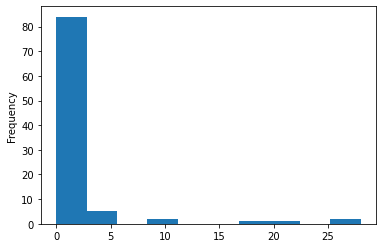

In [372]:
free_trial_user_time_taken['time_taken_to_free_trial'].plot(kind='hist')  # Plot the chart
plt.show()

In [373]:
free_trial_user_duration=free_trial_user_details.groupby('user_id').agg({'event_date':{'min','max'}}).reset_index()
free_trial_user_duration.head()

user_id event_date           
                                           min        max
0  063EAA99B92148EBA2213817E38FFE51 2022-03-19 2022-03-19
1  06DE55C5D0AA469BAAFFA05813717A9B 2022-03-21 2022-03-23
2  0760FDA5512048068764DDF2D2F09263 2022-03-31 2022-04-04
3  09BBC4CE62664E70A0EC8AC78EACC2E2 2022-04-02 2022-04-02
4  0BA9F642921F417581A23D0791DDCE3F 2022-03-18 2022-04-02

In [374]:

free_trial_user_duration.columns=['user_id','min','max']
free_trial_user_duration.head()

,user_id,min,max
0,063EAA99B92148EBA2213817E38FFE51,2022-03-19,2022-03-19
1,06DE55C5D0AA469BAAFFA05813717A9B,2022-03-21,2022-03-23
2,0760FDA5512048068764DDF2D2F09263,2022-03-31,2022-04-04
3,09BBC4CE62664E70A0EC8AC78EACC2E2,2022-04-02,2022-04-02
4,0BA9F642921F417581A23D0791DDCE3F,2022-03-18,2022-04-02


In [375]:
free_trial_user_duration['days']=free_trial_user_duration['max']-free_trial_user_duration['min']
free_trial_user_duration.head()

,user_id,min,max,days
0,063EAA99B92148EBA2213817E38FFE51,2022-03-19,2022-03-19,0 days
1,06DE55C5D0AA469BAAFFA05813717A9B,2022-03-21,2022-03-23,2 days
2,0760FDA5512048068764DDF2D2F09263,2022-03-31,2022-04-04,4 days
3,09BBC4CE62664E70A0EC8AC78EACC2E2,2022-04-02,2022-04-02,0 days
4,0BA9F642921F417581A23D0791DDCE3F,2022-03-18,2022-04-02,15 days


In [376]:
free_trial_user_duration['days'] = (free_trial_user_duration['days'] / np.timedelta64(1, 'D')).round().astype('int')
free_trial_user_duration.head()

,user_id,min,max,days
0,063EAA99B92148EBA2213817E38FFE51,2022-03-19,2022-03-19,0
1,06DE55C5D0AA469BAAFFA05813717A9B,2022-03-21,2022-03-23,2
2,0760FDA5512048068764DDF2D2F09263,2022-03-31,2022-04-04,4
3,09BBC4CE62664E70A0EC8AC78EACC2E2,2022-04-02,2022-04-02,0
4,0BA9F642921F417581A23D0791DDCE3F,2022-03-18,2022-04-02,15


In [377]:
#users in free_trial that are active after 7 days
free_trial_user_duration=free_trial_user_duration[free_trial_user_duration['days']>=7]

In [378]:
free_trial_user_duration_list=free_trial_user_duration['user_id'].unique().tolist()
free_trial_user_duration_list

['0BA9F642921F417581A23D0791DDCE3F',
 '135C7F10587C4D90955AECE2AC0FE9F7',
 '18B66F496C4640389A4E60A38F613604',
 '1913A3CB33D14326AD4D7A9B355C4C17',
 '223CCD13477447AB8C7994D7F329B142',
 '288472288B164411BC721EF1170B9D5E',
 '3CEE3FFC99654230896E9D779B8D77AC',
 '3DC2B3B4D84A4D22847914B61AB49A5D',
 '3EBA29D48E024FD0A9796EFF4C8971F9',
 '411F164F4178455796A8E276F0D11480',
 '481E8FC2F7BD4BAD8F92DCDF88BFA943',
 '492FF5F9940B4F0081A7BE2737BFC64D',
 '4E77B72BCF7947AE896EAD44D883748D',
 '655992CD617A47AA9AF6E1913AF952D2',
 '698340F3263748A28AA14D4D12AF56BC',
 '69FDD78A877D4D8080608CB162B62134',
 '79B67806153F48F29515351DDD843734',
 '7BBF7D93E19C477294E7D1EE6937A084',
 '8596EC0E9D51467FA6F2BE75ABBF58C2',
 '86F487CDDE65471D98168220B591A41D',
 '8A194D84EC9C4009B098C758BEBC3A80',
 '8DE77C90F9E84709887AC78DFE050F02',
 '973B097B415E481F84659283D6A665D3',
 '9B01E819737B43B28B9A8A1D9BADC223',
 'B2B321A5D1544A018EAF4010AADB63E6',
 'BDA0B8EAC1A14926BF072407FA90D121',
 'BDFA8BC95C66413CB00DE8E49F1CFD86',
 

In [379]:
free_trial_user_duration_list_details=free_trial_user_details[free_trial_user_details['user_id'].isin(free_trial_user_duration['user_id'])]

In [380]:
free_trial_user_duration_list_details.head()

,user_id,event_name,event_value_in_usd,event_bundle_sequence_id,event_ts,event_first_touch_ts,parameter_name,int_value,string_value,float_value,...,country,region,city,source_name,source_medium,source,platform,event_datetime,event_first_touch_datetime,event_date
182,EDCF49E15D5F4A3AA2159B9EAB7011C6,in_app_purchase,17.981905,13,2022-02-27 16:28:54 UTC,2022-02-27 16:25:56 UTC,ga_session_number,1,na,0.0,...,Germany,North Rhine-Westphalia,Duisburg,(direct),(none),(direct),IOS,2022-02-27 16:28:54,2022-02-27 16:25:56,2022-02-27
183,EDCF49E15D5F4A3AA2159B9EAB7011C6,in_app_purchase,17.981905,13,2022-02-27 16:28:54 UTC,2022-02-27 16:25:56 UTC,firebase_event_origin,0,auto,0.0,...,Germany,North Rhine-Westphalia,Duisburg,(direct),(none),(direct),IOS,2022-02-27 16:28:54,2022-02-27 16:25:56,2022-02-27
184,EDCF49E15D5F4A3AA2159B9EAB7011C6,in_app_purchase,17.981905,13,2022-02-27 16:28:54 UTC,2022-02-27 16:25:56 UTC,product_name,0,Premium Lifetime,0.0,...,Germany,North Rhine-Westphalia,Duisburg,(direct),(none),(direct),IOS,2022-02-27 16:28:54,2022-02-27 16:25:56,2022-02-27
185,EDCF49E15D5F4A3AA2159B9EAB7011C6,in_app_purchase,17.981905,13,2022-02-27 16:28:54 UTC,2022-02-27 16:25:56 UTC,firebase_conversion,1,na,0.0,...,Germany,North Rhine-Westphalia,Duisburg,(direct),(none),(direct),IOS,2022-02-27 16:28:54,2022-02-27 16:25:56,2022-02-27
186,EDCF49E15D5F4A3AA2159B9EAB7011C6,in_app_purchase,17.981905,13,2022-02-27 16:28:54 UTC,2022-02-27 16:25:56 UTC,price,15990000,na,0.0,...,Germany,North Rhine-Westphalia,Duisburg,(direct),(none),(direct),IOS,2022-02-27 16:28:54,2022-02-27 16:25:56,2022-02-27


In [381]:
free_trial_user_duration_list_details[free_trial_user_duration_list_details['user_id']=='EDCF49E15D5F4A3AA2159B9EAB7011C6'].sort_values(by='event_ts',ascending=True).iloc[940:1000]

,user_id,event_name,event_value_in_usd,event_bundle_sequence_id,event_ts,event_first_touch_ts,parameter_name,int_value,string_value,float_value,...,country,region,city,source_name,source_medium,source,platform,event_datetime,event_first_touch_datetime,event_date
973961,EDCF49E15D5F4A3AA2159B9EAB7011C6,result_breathe,NaN,40,2022-03-07 06:18:30 UTC,2022-02-27 16:25:56 UTC,firebase_event_origin,0,app,0.0,...,Germany,North Rhine-Westphalia,Duisburg,(direct),(none),(direct),IOS,2022-03-07 06:18:30,2022-02-27 16:25:56,2022-03-07
973962,EDCF49E15D5F4A3AA2159B9EAB7011C6,result_breathe,NaN,40,2022-03-07 06:18:30 UTC,2022-02-27 16:25:56 UTC,result,0,na,0.0,...,Germany,North Rhine-Westphalia,Duisburg,(direct),(none),(direct),IOS,2022-03-07 06:18:30,2022-02-27 16:25:56,2022-03-07
973963,EDCF49E15D5F4A3AA2159B9EAB7011C6,result_breathe,NaN,40,2022-03-07 06:18:30 UTC,2022-02-27 16:25:56 UTC,firebase_screen_class,0,FlutterViewController,0.0,...,Germany,North Rhine-Westphalia,Duisburg,(direct),(none),(direct),IOS,2022-03-07 06:18:30,2022-02-27 16:25:56,2022-03-07
973964,EDCF49E15D5F4A3AA2159B9EAB7011C6,result_breathe,NaN,40,2022-03-07 06:18:30 UTC,2022-02-27 16:25:56 UTC,engaged_session_event,1,na,0.0,...,Germany,North Rhine-Westphalia,Duisburg,(direct),(none),(direct),IOS,2022-03-07 06:18:30,2022-02-27 16:25:56,2022-03-07
973965,EDCF49E15D5F4A3AA2159B9EAB7011C6,result_breathe,NaN,40,2022-03-07 06:18:30 UTC,2022-02-27 16:25:56 UTC,firebase_screen_id,5900877032369820672,na,0.0,...,Germany,North Rhine-Westphalia,Duisburg,(direct),(none),(direct),IOS,2022-03-07 06:18:30,2022-02-27 16:25:56,2022-03-07
973966,EDCF49E15D5F4A3AA2159B9EAB7011C6,result_breathe,NaN,40,2022-03-07 06:18:30 UTC,2022-02-27 16:25:56 UTC,ga_session_id,1646633483,na,0.0,...,Germany,North Rhine-Westphalia,Duisburg,(direct),(none),(direct),IOS,2022-03-07 06:18:30,2022-02-27 16:25:56,2022-03-07
973969,EDCF49E15D5F4A3AA2159B9EAB7011C6,scr_stress_level,NaN,40,2022-03-07 06:18:32 UTC,2022-02-27 16:25:56 UTC,engaged_session_event,1,na,0.0,...,Germany,North Rhine-Westphalia,Duisburg,(direct),(none),(direct),IOS,2022-03-07 06:18:32,2022-02-27 16:25:56,2022-03-07
973968,EDCF49E15D5F4A3AA2159B9EAB7011C6,scr_stress_level,NaN,40,2022-03-07 06:18:32 UTC,2022-02-27 16:25:56 UTC,ga_session_number,7,na,0.0,...,Germany,North Rhine-Westphalia,Duisburg,(direct),(none),(direct),IOS,2022-03-07 06:18:32,2022-02-27 16:25:56,2022-03-07
973973,EDCF49E15D5F4A3AA2159B9EAB7011C6,scr_stress_level,NaN,40,2022-03-07 06:18:32 UTC,2022-02-27 16:25:56 UTC,firebase_screen_class,0,FlutterViewController,0.0,...,Germany,North Rhine-Westphalia,Duisburg,(direct),(none),(direct),IOS,2022-03-07 06:18:32,2022-02-27 16:25:56,2022-03-07
973971,EDCF49E15D5F4A3AA2159B9EAB7011C6,scr_stress_level,NaN,40,2022-03-07 06:18:32 UTC,2022-02-27 16:25:56 UTC,ga_session_id,1646633483,na,0.0,...,Germany,North Rhine-Westphalia,Duisburg,(direct),(none),(direct),IOS,2022-03-07 06:18:32,2022-02-27 16:25:56,2022-03-07


Looking at the user 'EDCF49E15D5F4A3AA2159B9EAB7011C6' , we see that the user first opts for free trial but within minutes gets
a paid subscription to app.norbu.premium_sale of worth 17.98$.

In [382]:
free_trial_user_duration_list_details[(free_trial_user_duration_list_details['user_id']=='8596EC0E9D51467FA6F2BE75ABBF58C2') ].sort_values(by='event_ts',ascending=True).iloc[240:300]

,user_id,event_name,event_value_in_usd,event_bundle_sequence_id,event_ts,event_first_touch_ts,parameter_name,int_value,string_value,float_value,...,country,region,city,source_name,source_medium,source,platform,event_datetime,event_first_touch_datetime,event_date
2093,8596EC0E9D51467FA6F2BE75ABBF58C2,in_app_purchase,0.0,14,2022-04-04 00:29:49 UTC,2022-03-11 21:08:10 UTC,validated,1,na,0.0,...,Russia,Sverdlovsk Oblast,Yekaterinburg,(direct),(none),(direct),IOS,2022-04-04 00:29:49,2022-03-11 21:08:10,2022-04-04
2094,8596EC0E9D51467FA6F2BE75ABBF58C2,in_app_purchase,0.0,14,2022-04-04 00:29:49 UTC,2022-03-11 21:08:10 UTC,ga_dedupe_id,2404380919274694656,na,0.0,...,Russia,Sverdlovsk Oblast,Yekaterinburg,(direct),(none),(direct),IOS,2022-04-04 00:29:49,2022-03-11 21:08:10,2022-04-04
2095,8596EC0E9D51467FA6F2BE75ABBF58C2,in_app_purchase,0.0,14,2022-04-04 00:29:49 UTC,2022-03-11 21:08:10 UTC,price_is_discounted,1,na,0.0,...,Russia,Sverdlovsk Oblast,Yekaterinburg,(direct),(none),(direct),IOS,2022-04-04 00:29:49,2022-03-11 21:08:10,2022-04-04
2108,8596EC0E9D51467FA6F2BE75ABBF58C2,in_app_purchase,0.0,14,2022-04-04 00:29:49 UTC,2022-03-11 21:08:10 UTC,firebase_conversion,1,na,0.0,...,Russia,Sverdlovsk Oblast,Yekaterinburg,(direct),(none),(direct),IOS,2022-04-04 00:29:49,2022-03-11 21:08:10,2022-04-04
2096,8596EC0E9D51467FA6F2BE75ABBF58C2,in_app_purchase,0.0,14,2022-04-04 00:29:49 UTC,2022-03-11 21:08:10 UTC,product_id,0,norbu_annual_ios,0.0,...,Russia,Sverdlovsk Oblast,Yekaterinburg,(direct),(none),(direct),IOS,2022-04-04 00:29:49,2022-03-11 21:08:10,2022-04-04
2107,8596EC0E9D51467FA6F2BE75ABBF58C2,in_app_purchase,0.0,14,2022-04-04 00:29:49 UTC,2022-03-11 21:08:10 UTC,value,0,na,0.0,...,Russia,Sverdlovsk Oblast,Yekaterinburg,(direct),(none),(direct),IOS,2022-04-04 00:29:49,2022-03-11 21:08:10,2022-04-04
2106,8596EC0E9D51467FA6F2BE75ABBF58C2,in_app_purchase,0.0,14,2022-04-04 00:29:49 UTC,2022-03-11 21:08:10 UTC,firebase_screen_class,0,FlutterViewController,0.0,...,Russia,Sverdlovsk Oblast,Yekaterinburg,(direct),(none),(direct),IOS,2022-04-04 00:29:49,2022-03-11 21:08:10,2022-04-04
2105,8596EC0E9D51467FA6F2BE75ABBF58C2,in_app_purchase,0.0,14,2022-04-04 00:29:49 UTC,2022-03-11 21:08:10 UTC,engaged_session_event,1,na,0.0,...,Russia,Sverdlovsk Oblast,Yekaterinburg,(direct),(none),(direct),IOS,2022-04-04 00:29:49,2022-03-11 21:08:10,2022-04-04
2104,8596EC0E9D51467FA6F2BE75ABBF58C2,in_app_purchase,0.0,14,2022-04-04 00:29:49 UTC,2022-03-11 21:08:10 UTC,free_trial,1,na,0.0,...,Russia,Sverdlovsk Oblast,Yekaterinburg,(direct),(none),(direct),IOS,2022-04-04 00:29:49,2022-03-11 21:08:10,2022-04-04
2109,8596EC0E9D51467FA6F2BE75ABBF58C2,in_app_purchase,0.0,14,2022-04-04 00:29:49 UTC,2022-03-11 21:08:10 UTC,original_price,1990000000,na,0.0,...,Russia,Sverdlovsk Oblast,Yekaterinburg,(direct),(none),(direct),IOS,2022-04-04 00:29:49,2022-03-11 21:08:10,2022-04-04


In [383]:
#number of active users after free_trial for 7 days 
free_trial_user_duration_list_details['user_id'].nunique()

32

In [384]:
free_trial_user_duration_list_details['event_value_in_usd'].unique()

array([17.981905,  0.      ,       nan])

In [385]:
free_trial_user_duration_list_details['revenue'].unique()

array([17.981905,  0.      , 50.802694, 18.673615])

In [386]:
free_trial_user_duration_list_details[free_trial_user_duration_list_details['revenue']==50.802694].head()

,user_id,event_name,event_value_in_usd,event_bundle_sequence_id,event_ts,event_first_touch_ts,parameter_name,int_value,string_value,float_value,...,country,region,city,source_name,source_medium,source,platform,event_datetime,event_first_touch_datetime,event_date
973925,EDCF49E15D5F4A3AA2159B9EAB7011C6,scr_home,NaN,39,2022-03-07 06:11:24 UTC,2022-02-27 16:25:56 UTC,engaged_session_event,1,na,0.0,...,Germany,North Rhine-Westphalia,Duisburg,(direct),(none),(direct),IOS,2022-03-07 06:11:24,2022-02-27 16:25:56,2022-03-07
973926,EDCF49E15D5F4A3AA2159B9EAB7011C6,scr_home,NaN,39,2022-03-07 06:11:24 UTC,2022-02-27 16:25:56 UTC,ga_session_id,1646633483,na,0.0,...,Germany,North Rhine-Westphalia,Duisburg,(direct),(none),(direct),IOS,2022-03-07 06:11:24,2022-02-27 16:25:56,2022-03-07
973927,EDCF49E15D5F4A3AA2159B9EAB7011C6,scr_home,NaN,39,2022-03-07 06:11:24 UTC,2022-02-27 16:25:56 UTC,ga_session_number,7,na,0.0,...,Germany,North Rhine-Westphalia,Duisburg,(direct),(none),(direct),IOS,2022-03-07 06:11:24,2022-02-27 16:25:56,2022-03-07
973928,EDCF49E15D5F4A3AA2159B9EAB7011C6,scr_home,NaN,39,2022-03-07 06:11:24 UTC,2022-02-27 16:25:56 UTC,firebase_screen_class,0,FlutterViewController,0.0,...,Germany,North Rhine-Westphalia,Duisburg,(direct),(none),(direct),IOS,2022-03-07 06:11:24,2022-02-27 16:25:56,2022-03-07
973929,EDCF49E15D5F4A3AA2159B9EAB7011C6,scr_home,NaN,39,2022-03-07 06:11:24 UTC,2022-02-27 16:25:56 UTC,firebase_screen_id,5900877032369820672,na,0.0,...,Germany,North Rhine-Westphalia,Duisburg,(direct),(none),(direct),IOS,2022-03-07 06:11:24,2022-02-27 16:25:56,2022-03-07


In [387]:
free_trial_user_duration_list_details['revenue'].value_counts()

0.000000     27187
18.673615     1274
50.802694     1043
17.981905      663
Name: revenue, dtype: int64

In [388]:
free_trial_user_duration_list_details=free_trial_user_duration_list_details.pivot_table(index='user_id',values='revenue',aggfunc='sum').reset_index()
free_trial_user_duration_list_details.head()

,user_id,revenue
0,0BA9F642921F417581A23D0791DDCE3F,0.0
1,135C7F10587C4D90955AECE2AC0FE9F7,0.0
2,18B66F496C4640389A4E60A38F613604,0.0
3,1913A3CB33D14326AD4D7A9B355C4C17,0.0
4,223CCD13477447AB8C7994D7F329B142,0.0


Of the 104 users in free trial ,around 32 users are active after 7 days but only 1 goes for paid subscription..

In [389]:
free_trial_user_details.groupby('user_id').agg({'event_date':'max'}).head()

,event_date
user_id,
063EAA99B92148EBA2213817E38FFE51,2022-03-19
06DE55C5D0AA469BAAFFA05813717A9B,2022-03-23
0760FDA5512048068764DDF2D2F09263,2022-04-04
09BBC4CE62664E70A0EC8AC78EACC2E2,2022-04-02
0BA9F642921F417581A23D0791DDCE3F,2022-04-02


In [390]:
free_trial_product=free_trial_user_details.query(' parameter_name=="product_id"' )
free_trial_product=free_trial_product.rename(columns={'string_value':'product_id'})

In [391]:
free_trial_product.head()

,user_id,event_name,event_value_in_usd,event_bundle_sequence_id,event_ts,event_first_touch_ts,parameter_name,int_value,product_id,float_value,...,country,region,city,source_name,source_medium,source,platform,event_datetime,event_first_touch_datetime,event_date
188,EDCF49E15D5F4A3AA2159B9EAB7011C6,in_app_purchase,17.981905,13,2022-02-27 16:28:54 UTC,2022-02-27 16:25:56 UTC,product_id,0,app.norbu.premium_sale,0.0,...,Germany,North Rhine-Westphalia,Duisburg,(direct),(none),(direct),IOS,2022-02-27 16:28:54,2022-02-27 16:25:56,2022-02-27
381,655992CD617A47AA9AF6E1913AF952D2,in_app_purchase,0.000000,8,2022-03-16 19:27:47 UTC,2022-03-16 19:26:28 UTC,product_id,0,norbu_annual_ios,0.0,...,NaN,NaN,NaN,(direct),(none),(direct),IOS,2022-03-16 19:27:47,2022-03-16 19:26:28,2022-03-16
400,2525BD9229A74F5797EBC9F3E5D5D825,in_app_purchase,0.000000,8,2022-03-15 21:17:25 UTC,2022-03-15 21:16:27 UTC,product_id,0,norbu_annual_ios,0.0,...,NaN,NaN,NaN,(direct),(none),(direct),IOS,2022-03-15 21:17:25,2022-03-15 21:16:27,2022-03-15
408,BB848B287D8046D48E7C3946188167F4,in_app_purchase,0.000000,10,2022-03-16 09:12:34 UTC,2022-03-16 09:11:10 UTC,product_id,0,norbu_annual_ios,0.0,...,NaN,NaN,NaN,(direct),(none),(direct),IOS,2022-03-16 09:12:34,2022-03-16 09:11:10,2022-03-16
440,B38D36DD9B6245C591E6868E90082EFE,in_app_purchase,0.000000,8,2022-03-20 09:01:25 UTC,2022-03-20 09:00:11 UTC,product_id,0,norbu_annual_ios,0.0,...,Russia,Khabarovsk Krai,Khabarovsk,(direct),(none),(direct),IOS,2022-03-20 09:01:25,2022-03-20 09:00:11,2022-03-20


In [392]:
#duplicate handling
free_trial_product['user_id'].duplicated().sum()

108

In [393]:
free_trial_product=free_trial_product.drop_duplicates(subset='user_id')

In [394]:
#product/plan used in free trial
free_trial_product['product_id'].value_counts()

norbu_annual_ios          103
app.norbu.premium_sale      1
Name: product_id, dtype: int64

norbu_annual_ios is the product chosen by all the users who went with free trial based on the above analysis...  
1 of the 103 user gets a paid subscription for the product 'app.norbu.prermium_sale' ..

In [395]:
free_trial_user_details['event_value_in_usd'].value_counts()

0.000000     1962
17.981905      14
Name: event_value_in_usd, dtype: int64

In [396]:
free_trial_user_details[free_trial_user_details['event_value_in_usd']==0].tail()

,user_id,event_name,event_value_in_usd,event_bundle_sequence_id,event_ts,event_first_touch_ts,parameter_name,int_value,string_value,float_value,...,country,region,city,source_name,source_medium,source,platform,event_datetime,event_first_touch_datetime,event_date
2541,7C1C90404EF54DB4AEF8EF42AC8DB759,in_app_purchase,0.0,8,2022-03-17 15:22:16 UTC,2022-03-17 15:20:37 UTC,firebase_conversion,1,na,0.0,...,Russia,Nizhny Novgorod Oblast,NaN,(direct),(none),(direct),IOS,2022-03-17 15:22:16,2022-03-17 15:20:37,2022-03-17
2542,7C1C90404EF54DB4AEF8EF42AC8DB759,in_app_purchase,0.0,8,2022-03-17 15:22:16 UTC,2022-03-17 15:20:37 UTC,product_id,0,norbu_annual_ios,0.0,...,Russia,Nizhny Novgorod Oblast,NaN,(direct),(none),(direct),IOS,2022-03-17 15:22:16,2022-03-17 15:20:37,2022-03-17
2543,7C1C90404EF54DB4AEF8EF42AC8DB759,in_app_purchase,0.0,8,2022-03-17 15:22:16 UTC,2022-03-17 15:20:37 UTC,product_name,0,Премиум подписка на год,0.0,...,Russia,Nizhny Novgorod Oblast,NaN,(direct),(none),(direct),IOS,2022-03-17 15:22:16,2022-03-17 15:20:37,2022-03-17
2544,7C1C90404EF54DB4AEF8EF42AC8DB759,in_app_purchase,0.0,8,2022-03-17 15:22:16 UTC,2022-03-17 15:20:37 UTC,value,0,na,0.0,...,Russia,Nizhny Novgorod Oblast,NaN,(direct),(none),(direct),IOS,2022-03-17 15:22:16,2022-03-17 15:20:37,2022-03-17
2545,7C1C90404EF54DB4AEF8EF42AC8DB759,in_app_purchase,0.0,8,2022-03-17 15:22:16 UTC,2022-03-17 15:20:37 UTC,price,0,na,0.0,...,Russia,Nizhny Novgorod Oblast,NaN,(direct),(none),(direct),IOS,2022-03-17 15:22:16,2022-03-17 15:20:37,2022-03-17


One user has purchased 'app.norbu.premium_sale' of original value 29.99 on sale with value of 17.99usd.	  
all other users purchased 'norbu_annual_ios' of original price 19.99 for 0 on free trial..

In [397]:
#users in free_trial who becomes paid user..
free_trial_to_paid_user=1

In [398]:
#analyse inapp purchase
in_app_purchase=premium_app_purchase_users[premium_app_purchase_users['event_name'].isin(['in_app_purchase'])]
in_app_purchase.head()

,user_id,event_name,event_value_in_usd,event_bundle_sequence_id,event_ts,event_first_touch_ts,parameter_name,int_value,string_value,float_value,...,revenue,currency,continent,country,region,city,source_name,source_medium,source,platform
0,4B7A35A1424E402DA835D590FEBE4712,in_app_purchase,47.030256,30,2022-03-14 23:16:13 UTC,2022-03-01 18:58:41 UTC,firebase_conversion,1,na,0.0,...,47.030256,USD,Europe,Belgium,Wallonia,Liege,(direct),(none),(direct),IOS
1,4B7A35A1424E402DA835D590FEBE4712,in_app_purchase,47.030256,30,2022-03-14 23:16:13 UTC,2022-03-01 18:58:41 UTC,engaged_session_event,1,na,0.0,...,47.030256,USD,Europe,Belgium,Wallonia,Liege,(direct),(none),(direct),IOS
2,4B7A35A1424E402DA835D590FEBE4712,in_app_purchase,47.030256,30,2022-03-14 23:16:13 UTC,2022-03-01 18:58:41 UTC,validated,1,na,0.0,...,47.030256,USD,Europe,Belgium,Wallonia,Liege,(direct),(none),(direct),IOS
3,4B7A35A1424E402DA835D590FEBE4712,in_app_purchase,47.030256,30,2022-03-14 23:16:13 UTC,2022-03-01 18:58:41 UTC,value,42990000,na,0.0,...,47.030256,USD,Europe,Belgium,Wallonia,Liege,(direct),(none),(direct),IOS
4,4B7A35A1424E402DA835D590FEBE4712,in_app_purchase,47.030256,30,2022-03-14 23:16:13 UTC,2022-03-01 18:58:41 UTC,price,42990000,na,0.0,...,47.030256,USD,Europe,Belgium,Wallonia,Liege,(direct),(none),(direct),IOS


***analyse different parameter names***

In [399]:
in_app_purchase['parameter_name'].value_counts()

firebase_conversion      157
quantity                 157
firebase_event_origin    157
ga_session_number        157
ga_session_id            157
currency                 157
product_id               157
price                    157
value                    157
engaged_session_event    149
subscription             139
ga_dedupe_id             116
product_name             116
validated                116
firebase_screen_id       109
firebase_screen_class    109
free_trial               104
original_price           104
price_is_discounted      104
Name: parameter_name, dtype: int64

In [400]:
in_app_purchase[in_app_purchase['parameter_name']=='subscription']['int_value'].unique()

array([1], dtype=int64)

In [401]:
in_app_purchase[(in_app_purchase['parameter_name']=='subscription') & (in_app_purchase['int_value']==1)].head()

,user_id,event_name,event_value_in_usd,event_bundle_sequence_id,event_ts,event_first_touch_ts,parameter_name,int_value,string_value,float_value,...,revenue,currency,continent,country,region,city,source_name,source_medium,source,platform
128,721df9d4e776542b083895b7d9afb566,in_app_purchase,23.190445,7,2022-04-04 11:59:30 UTC,2022-04-03 08:11:44 UTC,subscription,1,na,0.0,...,23.190445,USD,Europe,Austria,Vienna,Vienna,NaN,organic,google-play,ANDROID
215,CB3506F7535747F5986FEE682F3B478E,in_app_purchase,5.845534,28,2022-03-28 06:53:11 UTC,2022-03-18 11:05:00 UTC,subscription,1,na,0.0,...,5.845534,USD,Europe,Sweden,Uppsala County,Enkoping,(direct),(none),(direct),IOS
239,9F303298E6B24E79AE79DB87480F7935,in_app_purchase,5.535624,14,2022-04-02 04:17:04 UTC,2022-03-01 02:39:03 UTC,subscription,1,na,0.0,...,5.535624,USD,(not set),United States,NaN,NaN,(direct),(none),(direct),IOS
252,0852a1ea2cdc0b847652645c5b5c8fc2,in_app_purchase,4.156403,8,2022-03-15 06:55:00 UTC,2022-02-15 13:50:20 UTC,subscription,1,na,0.0,...,4.156403,USD,Americas,Brazil,State of Ceara,Tiangua,(direct),(none),(direct),ANDROID
264,5cef04d88378b12ab96aeb5058cd5ac1,in_app_purchase,3.638628,6,2022-03-16 19:29:05 UTC,2022-03-16 19:25:07 UTC,subscription,1,na,0.0,...,3.638628,USD,(not set),NaN,NaN,NaN,NaN,organic,google-play,ANDROID


In [402]:
in_app_purchase[(in_app_purchase['parameter_name'].isin(['subscription','product_id','price_is_discounted'])) ].iloc[0:60]

,user_id,event_name,event_value_in_usd,event_bundle_sequence_id,event_ts,event_first_touch_ts,parameter_name,int_value,string_value,float_value,...,revenue,currency,continent,country,region,city,source_name,source_medium,source,platform
5,4B7A35A1424E402DA835D590FEBE4712,in_app_purchase,47.030256,30,2022-03-14 23:16:13 UTC,2022-03-01 18:58:41 UTC,product_id,0,app.norbu.premium,0.0,...,47.030256,USD,Europe,Belgium,Wallonia,Liege,(direct),(none),(direct),IOS
13,353B042B141B4094BA41C77A43C22008,in_app_purchase,42.990000,8,2022-03-20 07:11:49 UTC,2022-03-20 07:10:14 UTC,product_id,0,app.norbu.premium,0.0,...,42.990000,USD,Americas,Ecuador,Guayas,NaN,(direct),(none),(direct),IOS
33,b93f6a6979bbe9caa032325379747855,in_app_purchase,30.140465,24,2022-03-10 01:10:52 UTC,2021-10-31 17:47:44 UTC,product_id,0,app.norbu.premium,0.0,...,30.140465,USD,Europe,United Kingdom,England,London,NaN,organic,google-play,ANDROID
38,65b3533a782518ba13efe369d9f26e8d,in_app_purchase,29.941183,7,2022-04-01 13:04:46 UTC,2022-04-01 12:45:38 UTC,product_id,0,app.norbu.premium,0.0,...,29.941183,USD,Europe,France,Ile-de-France,Argenteuil,NaN,organic,google-play,ANDROID
50,7bfe8540e005e45dd6965c4b584f43cf,in_app_purchase,29.819680,26,2022-04-03 06:17:09 UTC,2022-04-02 17:12:04 UTC,product_id,0,app.norbu.premium,0.0,...,29.819680,USD,Europe,Germany,Lower Saxony,Delmenhorst,NaN,organic,google-play,ANDROID
60,20092104e2bba5efb0cf162a4f2baa17,in_app_purchase,29.819443,13,2022-04-03 12:35:44 UTC,2022-04-03 00:41:45 UTC,product_id,0,app.norbu.premium,0.0,...,29.819443,USD,Europe,Austria,Styria,Graz,NaN,organic,google-play,ANDROID
69,1548bcb69227e09a561ac4954fe069ed,in_app_purchase,29.543428,4,2022-03-05 14:52:29 UTC,2022-03-05 14:50:59 UTC,product_id,0,app.norbu.premium,0.0,...,29.543428,USD,Europe,Germany,Baden-Wurttemberg,Stuttgart,NaN,organic,google-play,ANDROID
78,4325af0985c420bd1978e5e3fc98340c,in_app_purchase,29.541425,44,2022-03-12 18:45:58 UTC,2021-12-09 08:41:50 UTC,product_id,0,app.norbu.premium,0.0,...,29.541425,USD,Europe,France,Ile-de-France,Paris,NaN,organic,google-play,ANDROID
96,a571f3e6c84f97ca58562ad96f1231ca,in_app_purchase,28.376348,27,2022-03-12 06:50:06 UTC,2021-10-30 18:53:44 UTC,product_id,0,app.norbu.premium,0.0,...,28.376348,USD,Europe,Czechia,Prague,Prague,NaN,organic,google-play,ANDROID
106,7161020c765c9b717cc67b29c3cddcd4,in_app_purchase,26.082262,41,2022-03-19 19:36:06 UTC,2021-03-02 21:22:27 UTC,product_id,0,app.norbu.premium,0.0,...,26.082262,USD,Africa,Egypt,Cairo Governorate,Cairo,(direct),(none),(direct),ANDROID


In [403]:
in_app_purchase[(in_app_purchase['parameter_name'].isin(['subscription'])) ]['user_id'].nunique()

138

In [404]:
in_app_purchase[(in_app_purchase['parameter_name'].isin(['subscription','product_id'])) ]['user_id'].nunique()

155

In [405]:
in_app_purchase[in_app_purchase['parameter_name']=='engaged_session_event']['int_value'].unique()

array([1], dtype=int64)

In [406]:
in_app_purchase[in_app_purchase['parameter_name']=='currency']['string_value'].unique()

array(['EUR', 'USD', 'GBP', 'CZK', 'EGP', 'HRK', 'RUB', 'SEK', 'BRL',
       'JPY', 'TRY', 'VND', 'BGN', 'BOB', 'PLN', 'SAR', 'CHF', 'MYR',
       'IQD'], dtype=object)

In [407]:
premium_app_purchase_users[premium_app_purchase_users['parameter_name']=='free_trial']['int_value'].unique()

array([1], dtype=int64)

In [408]:
premium_app_purchase_users[premium_app_purchase_users['parameter_name']=='price_is_discounted']['int_value'].unique()

array([1], dtype=int64)

In [409]:
premium_app_purchase_users[premium_app_purchase_users['parameter_name']=='validated']['int_value'].unique()

array([1], dtype=int64)

In [410]:
in_app_purchase['user_id'].nunique()

155

<a id='funnel'> 

### Event Funnel

in app purchase has users in free trial as well as users with paid subscription .We calculate users with paid subscription 
from users not in free trial.

In [411]:
#users with paid subscription
no_free_trial=in_app_purchase[~(in_app_purchase['user_id'].isin(free_trial_users))]

In [412]:
n_paid_subscription_users=no_free_trial['user_id'].nunique()

In [413]:
data= {'event_name':['Total Users','In_app purchase users','Free trial Users','Paid/Premium Subscription Users(Free_trial to paid + direct paid)(1+51)'],
        'n_users':[n_users,n_inapp_users,n_free_trial_users,(free_trial_to_paid_user+n_paid_subscription_users)]}
sequence_views=pd.DataFrame(data)
sequence_views

,event_name,n_users
0,Total Users,982
1,In_app purchase users,155
2,Free trial Users,104
3,Paid/Premium Subscription Users(Free_trial to paid + direct paid)(1+51),52


In [414]:
fig = go.Figure(go.Funnel(
    y = sequence_views['event_name'],
    x = sequence_views['n_users']
    ))
fig.show()

<a id='cr'> 

### Conversion rate

In [415]:
#in_app purchase rate
purchase_conversion_rate=(n_inapp_users/n_users)*100
purchase_conversion_rate

15.784114052953157

In [416]:
#free trial conversion rate
free_trial_conversion_rate=(n_free_trial_users/n_users)*100
free_trial_conversion_rate

10.590631364562118

In [417]:
#paid subscription rate
paid_subscription_conversion_rate=(n_paid_subscription_users/n_users)*100
paid_subscription_conversion_rate

5.193482688391039

***Conclusion***  

Of the total users only 5% ends up in paid subscription  and around 11% opts for free trial..  
Of the users in free trial , only 1 user less than 1% go for paid subscription..


In [418]:
no_free_trial.head()

,user_id,event_name,event_value_in_usd,event_bundle_sequence_id,event_ts,event_first_touch_ts,parameter_name,int_value,string_value,float_value,...,revenue,currency,continent,country,region,city,source_name,source_medium,source,platform
0,4B7A35A1424E402DA835D590FEBE4712,in_app_purchase,47.030256,30,2022-03-14 23:16:13 UTC,2022-03-01 18:58:41 UTC,firebase_conversion,1,na,0.0,...,47.030256,USD,Europe,Belgium,Wallonia,Liege,(direct),(none),(direct),IOS
1,4B7A35A1424E402DA835D590FEBE4712,in_app_purchase,47.030256,30,2022-03-14 23:16:13 UTC,2022-03-01 18:58:41 UTC,engaged_session_event,1,na,0.0,...,47.030256,USD,Europe,Belgium,Wallonia,Liege,(direct),(none),(direct),IOS
2,4B7A35A1424E402DA835D590FEBE4712,in_app_purchase,47.030256,30,2022-03-14 23:16:13 UTC,2022-03-01 18:58:41 UTC,validated,1,na,0.0,...,47.030256,USD,Europe,Belgium,Wallonia,Liege,(direct),(none),(direct),IOS
3,4B7A35A1424E402DA835D590FEBE4712,in_app_purchase,47.030256,30,2022-03-14 23:16:13 UTC,2022-03-01 18:58:41 UTC,value,42990000,na,0.0,...,47.030256,USD,Europe,Belgium,Wallonia,Liege,(direct),(none),(direct),IOS
4,4B7A35A1424E402DA835D590FEBE4712,in_app_purchase,47.030256,30,2022-03-14 23:16:13 UTC,2022-03-01 18:58:41 UTC,price,42990000,na,0.0,...,47.030256,USD,Europe,Belgium,Wallonia,Liege,(direct),(none),(direct),IOS


In [419]:
no_free_trial['platform'].value_counts()

ANDROID    436
IOS        167
Name: platform, dtype: int64

In [420]:
no_free_trial.query('platform=="ANDROID"')['user_id'].nunique()

40

In [421]:
no_free_trial.query('platform=="IOS"')['user_id'].nunique()

11

In [422]:
no_free_trial_users=no_free_trial['user_id'].unique().tolist()
no_free_trial_users

['4B7A35A1424E402DA835D590FEBE4712',
 '353B042B141B4094BA41C77A43C22008',
 'b93f6a6979bbe9caa032325379747855',
 '65b3533a782518ba13efe369d9f26e8d',
 '7bfe8540e005e45dd6965c4b584f43cf',
 '20092104e2bba5efb0cf162a4f2baa17',
 '1548bcb69227e09a561ac4954fe069ed',
 '4325af0985c420bd1978e5e3fc98340c',
 'a571f3e6c84f97ca58562ad96f1231ca',
 '7161020c765c9b717cc67b29c3cddcd4',
 'cc62e15b2c50259ccf5e87197793f40b',
 '721df9d4e776542b083895b7d9afb566',
 'FAAD267E640F462391F794EA046C9F0A',
 'bbb537a6a0104cd2e20ad7a4a90721ea',
 '5D14D82361B740ED8D2E09BD1FE15616',
 'C7CDEA0DE6664009B7D0901ED0723FB5',
 'f39ddc768f57cf872793463f41fe6060',
 'a6daa875cd1cd9c639ea9ac91ee46dcb',
 'CB3506F7535747F5986FEE682F3B478E',
 '9F303298E6B24E79AE79DB87480F7935',
 '0852a1ea2cdc0b847652645c5b5c8fc2',
 '5cef04d88378b12ab96aeb5058cd5ac1',
 '21898C965E9D4716BCD6183F5EDB62E9',
 'A9A66035D0EF4B49A5DB99C1BEA4C64A',
 'BDA771C0602246D28A39F098119D87A1',
 '8EBAE5F76A2A418BAA4FD35D07184283',
 '16a7c2cb1b670e47ff80d522c4568937',
 

In [423]:
no_free_trial['user_id'].isin(scr_premium_user_list).all()

False

In [424]:
#paid subscription user details
no_free_trial_users_details=premium_app_purchase_users[premium_app_purchase_users['user_id'].isin(no_free_trial['user_id'])]
no_free_trial_users_details.head()

,user_id,event_name,event_value_in_usd,event_bundle_sequence_id,event_ts,event_first_touch_ts,parameter_name,int_value,string_value,float_value,...,revenue,currency,continent,country,region,city,source_name,source_medium,source,platform
0,4B7A35A1424E402DA835D590FEBE4712,in_app_purchase,47.030256,30,2022-03-14 23:16:13 UTC,2022-03-01 18:58:41 UTC,firebase_conversion,1,na,0.0,...,47.030256,USD,Europe,Belgium,Wallonia,Liege,(direct),(none),(direct),IOS
1,4B7A35A1424E402DA835D590FEBE4712,in_app_purchase,47.030256,30,2022-03-14 23:16:13 UTC,2022-03-01 18:58:41 UTC,engaged_session_event,1,na,0.0,...,47.030256,USD,Europe,Belgium,Wallonia,Liege,(direct),(none),(direct),IOS
2,4B7A35A1424E402DA835D590FEBE4712,in_app_purchase,47.030256,30,2022-03-14 23:16:13 UTC,2022-03-01 18:58:41 UTC,validated,1,na,0.0,...,47.030256,USD,Europe,Belgium,Wallonia,Liege,(direct),(none),(direct),IOS
3,4B7A35A1424E402DA835D590FEBE4712,in_app_purchase,47.030256,30,2022-03-14 23:16:13 UTC,2022-03-01 18:58:41 UTC,value,42990000,na,0.0,...,47.030256,USD,Europe,Belgium,Wallonia,Liege,(direct),(none),(direct),IOS
4,4B7A35A1424E402DA835D590FEBE4712,in_app_purchase,47.030256,30,2022-03-14 23:16:13 UTC,2022-03-01 18:58:41 UTC,price,42990000,na,0.0,...,47.030256,USD,Europe,Belgium,Wallonia,Liege,(direct),(none),(direct),IOS


In [425]:
no_free_trial_users_details['event_datetime']=pd.to_datetime( no_free_trial_users_details['event_ts']).dt.tz_localize(None)
no_free_trial_users_details['event_first_touch_datetime']=pd.to_datetime( no_free_trial_users_details['event_first_touch_ts']).dt.tz_localize(None)
no_free_trial_users_details['event_date'] =pd.to_datetime(no_free_trial_users_details['event_datetime']).dt.normalize() 

In [426]:
no_free_trial_user_time_taken=no_free_trial_users_details[['user_id','event_name','event_datetime','event_first_touch_datetime']]

In [427]:
no_free_trial_user_time_taken=no_free_trial_user_time_taken.drop_duplicates()

In [428]:
no_free_trial_user_time_taken=no_free_trial_user_time_taken[no_free_trial_user_time_taken['event_name']=='in_app_purchase']
no_free_trial_user_time_taken.head()

,user_id,event_name,event_datetime,event_first_touch_datetime
0,4B7A35A1424E402DA835D590FEBE4712,in_app_purchase,2022-03-14 23:16:13,2022-03-01 18:58:41
13,353B042B141B4094BA41C77A43C22008,in_app_purchase,2022-03-20 07:11:49,2022-03-20 07:10:14
28,b93f6a6979bbe9caa032325379747855,in_app_purchase,2022-03-10 01:10:52,2021-10-31 17:47:44
38,65b3533a782518ba13efe369d9f26e8d,in_app_purchase,2022-04-01 13:04:46,2022-04-01 12:45:38
48,7bfe8540e005e45dd6965c4b584f43cf,in_app_purchase,2022-04-03 06:17:09,2022-04-02 17:12:04


In [429]:
#time taken by each user to become paid subscriber
no_free_trial_user_time_taken['time_taken_to_paid_subscription']=(no_free_trial_user_time_taken['event_datetime'] - no_free_trial_user_time_taken['event_first_touch_datetime'] )/ np.timedelta64(1, 'D')
no_free_trial_user_time_taken['time_taken_to_paid_subscription']=(no_free_trial_user_time_taken['time_taken_to_paid_subscription']).round().astype('int')
no_free_trial_user_time_taken.head()

,user_id,event_name,event_datetime,event_first_touch_datetime,time_taken_to_paid_subscription
0,4B7A35A1424E402DA835D590FEBE4712,in_app_purchase,2022-03-14 23:16:13,2022-03-01 18:58:41,13
13,353B042B141B4094BA41C77A43C22008,in_app_purchase,2022-03-20 07:11:49,2022-03-20 07:10:14,0
28,b93f6a6979bbe9caa032325379747855,in_app_purchase,2022-03-10 01:10:52,2021-10-31 17:47:44,129
38,65b3533a782518ba13efe369d9f26e8d,in_app_purchase,2022-04-01 13:04:46,2022-04-01 12:45:38,0
48,7bfe8540e005e45dd6965c4b584f43cf,in_app_purchase,2022-04-03 06:17:09,2022-04-02 17:12:04,1


In [430]:
no_free_trial_user_time_taken['time_taken_to_paid_subscription'].describe()

count     52.000000
mean      59.461538
std      125.113981
min        0.000000
25%        0.000000
50%        0.500000
75%       89.250000
max      666.000000
Name: time_taken_to_paid_subscription, dtype: float64

In [431]:
no_free_trial_user_time_taken['time_taken_to_paid_subscription'].value_counts()

0      26
1       2
13      1
28      1
115     1
5       1
128     1
113     1
19      1
94      1
11      1
3       1
12      1
88      1
32      1
10      1
342     1
275     1
666     1
292     1
6       1
382     1
132     1
93      1
129     1
102     1
Name: time_taken_to_paid_subscription, dtype: int64

More than 50% of users become paid subscription within a day..  
We see nearly 12-13% of users taking more months to become paid subscriber which cannot be ignored.. 

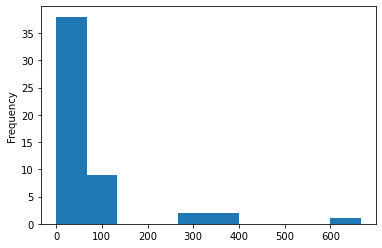

In [432]:
no_free_trial_user_time_taken['time_taken_to_paid_subscription'].plot(kind='hist',bins=10)

plt.show()

In [433]:
#analyse price,currency and product
no_free_trial_users_details.query('parameter_name in ("price","product_id","currency")').head()

,user_id,event_name,event_value_in_usd,event_bundle_sequence_id,event_ts,event_first_touch_ts,parameter_name,int_value,string_value,float_value,...,country,region,city,source_name,source_medium,source,platform,event_datetime,event_first_touch_datetime,event_date
4,4B7A35A1424E402DA835D590FEBE4712,in_app_purchase,47.030256,30,2022-03-14 23:16:13 UTC,2022-03-01 18:58:41 UTC,price,42990000,na,0.0,...,Belgium,Wallonia,Liege,(direct),(none),(direct),IOS,2022-03-14 23:16:13,2022-03-01 18:58:41,2022-03-14
5,4B7A35A1424E402DA835D590FEBE4712,in_app_purchase,47.030256,30,2022-03-14 23:16:13 UTC,2022-03-01 18:58:41 UTC,product_id,0,app.norbu.premium,0.0,...,Belgium,Wallonia,Liege,(direct),(none),(direct),IOS,2022-03-14 23:16:13,2022-03-01 18:58:41,2022-03-14
9,4B7A35A1424E402DA835D590FEBE4712,in_app_purchase,47.030256,30,2022-03-14 23:16:13 UTC,2022-03-01 18:58:41 UTC,currency,0,EUR,0.0,...,Belgium,Wallonia,Liege,(direct),(none),(direct),IOS,2022-03-14 23:16:13,2022-03-01 18:58:41,2022-03-14
13,353B042B141B4094BA41C77A43C22008,in_app_purchase,42.990000,8,2022-03-20 07:11:49 UTC,2022-03-20 07:10:14 UTC,product_id,0,app.norbu.premium,0.0,...,Ecuador,Guayas,NaN,(direct),(none),(direct),IOS,2022-03-20 07:11:49,2022-03-20 07:10:14,2022-03-20
14,353B042B141B4094BA41C77A43C22008,in_app_purchase,42.990000,8,2022-03-20 07:11:49 UTC,2022-03-20 07:10:14 UTC,price,42990000,na,0.0,...,Ecuador,Guayas,NaN,(direct),(none),(direct),IOS,2022-03-20 07:11:49,2022-03-20 07:10:14,2022-03-20


In [434]:
no_free_trial_users_details[no_free_trial_users_details['user_id']=='4B7A35A1424E402DA835D590FEBE4712'].sort_values(by='event_ts',ascending=True).iloc[600:660]

,user_id,event_name,event_value_in_usd,event_bundle_sequence_id,event_ts,event_first_touch_ts,parameter_name,int_value,string_value,float_value,...,country,region,city,source_name,source_medium,source,platform,event_datetime,event_first_touch_datetime,event_date
5955948,4B7A35A1424E402DA835D590FEBE4712,scr_home,NaN,31,2022-03-14 23:16:21 UTC,2022-03-01 18:58:41 UTC,ga_session_id,1647299092,na,0.0,...,Belgium,Wallonia,Liege,(direct),(none),(direct),IOS,2022-03-14 23:16:21,2022-03-01 18:58:41,2022-03-14
5955949,4B7A35A1424E402DA835D590FEBE4712,scr_home,NaN,31,2022-03-14 23:16:21 UTC,2022-03-01 18:58:41 UTC,firebase_event_origin,0,app,0.0,...,Belgium,Wallonia,Liege,(direct),(none),(direct),IOS,2022-03-14 23:16:21,2022-03-01 18:58:41,2022-03-14
5955950,4B7A35A1424E402DA835D590FEBE4712,scr_home,NaN,31,2022-03-14 23:16:21 UTC,2022-03-01 18:58:41 UTC,engaged_session_event,1,na,0.0,...,Belgium,Wallonia,Liege,(direct),(none),(direct),IOS,2022-03-14 23:16:21,2022-03-01 18:58:41,2022-03-14
5955947,4B7A35A1424E402DA835D590FEBE4712,scr_home,NaN,31,2022-03-14 23:16:21 UTC,2022-03-01 18:58:41 UTC,ga_session_number,7,na,0.0,...,Belgium,Wallonia,Liege,(direct),(none),(direct),IOS,2022-03-14 23:16:21,2022-03-01 18:58:41,2022-03-14
5955955,4B7A35A1424E402DA835D590FEBE4712,user_engagement,NaN,31,2022-03-14 23:16:24 UTC,2022-03-01 18:58:41 UTC,ga_session_number,7,na,0.0,...,Belgium,Wallonia,Liege,(direct),(none),(direct),IOS,2022-03-14 23:16:24,2022-03-01 18:58:41,2022-03-14
5955953,4B7A35A1424E402DA835D590FEBE4712,user_engagement,NaN,31,2022-03-14 23:16:24 UTC,2022-03-01 18:58:41 UTC,ga_session_id,1647299092,na,0.0,...,Belgium,Wallonia,Liege,(direct),(none),(direct),IOS,2022-03-14 23:16:24,2022-03-01 18:58:41,2022-03-14
5955952,4B7A35A1424E402DA835D590FEBE4712,user_engagement,NaN,31,2022-03-14 23:16:24 UTC,2022-03-01 18:58:41 UTC,firebase_event_origin,0,auto,0.0,...,Belgium,Wallonia,Liege,(direct),(none),(direct),IOS,2022-03-14 23:16:24,2022-03-01 18:58:41,2022-03-14
5955951,4B7A35A1424E402DA835D590FEBE4712,user_engagement,NaN,31,2022-03-14 23:16:24 UTC,2022-03-01 18:58:41 UTC,engagement_time_msec,12091,na,0.0,...,Belgium,Wallonia,Liege,(direct),(none),(direct),IOS,2022-03-14 23:16:24,2022-03-01 18:58:41,2022-03-14
5955954,4B7A35A1424E402DA835D590FEBE4712,user_engagement,NaN,31,2022-03-14 23:16:24 UTC,2022-03-01 18:58:41 UTC,engaged_session_event,1,na,0.0,...,Belgium,Wallonia,Liege,(direct),(none),(direct),IOS,2022-03-14 23:16:24,2022-03-01 18:58:41,2022-03-14
5955962,4B7A35A1424E402DA835D590FEBE4712,screen_view,NaN,32,2022-03-15 07:42:35 UTC,2022-03-01 18:58:41 UTC,firebase_screen_class,0,FlutterViewController,0.0,...,Belgium,Wallonia,Liege,(direct),(none),(direct),IOS,2022-03-15 07:42:35,2022-03-01 18:58:41,2022-03-15


In [435]:
#product used by paid subscriber
no_free_trial_product=no_free_trial.query(' parameter_name=="product_id"' )
no_free_trial_product=no_free_trial_product.rename(columns={'string_value':'product_id'})
no_free_trial_product.head()

,user_id,event_name,event_value_in_usd,event_bundle_sequence_id,event_ts,event_first_touch_ts,parameter_name,int_value,product_id,float_value,...,revenue,currency,continent,country,region,city,source_name,source_medium,source,platform
5,4B7A35A1424E402DA835D590FEBE4712,in_app_purchase,47.030256,30,2022-03-14 23:16:13 UTC,2022-03-01 18:58:41 UTC,product_id,0,app.norbu.premium,0.0,...,47.030256,USD,Europe,Belgium,Wallonia,Liege,(direct),(none),(direct),IOS
13,353B042B141B4094BA41C77A43C22008,in_app_purchase,42.990000,8,2022-03-20 07:11:49 UTC,2022-03-20 07:10:14 UTC,product_id,0,app.norbu.premium,0.0,...,42.990000,USD,Americas,Ecuador,Guayas,NaN,(direct),(none),(direct),IOS
33,b93f6a6979bbe9caa032325379747855,in_app_purchase,30.140465,24,2022-03-10 01:10:52 UTC,2021-10-31 17:47:44 UTC,product_id,0,app.norbu.premium,0.0,...,30.140465,USD,Europe,United Kingdom,England,London,NaN,organic,google-play,ANDROID
38,65b3533a782518ba13efe369d9f26e8d,in_app_purchase,29.941183,7,2022-04-01 13:04:46 UTC,2022-04-01 12:45:38 UTC,product_id,0,app.norbu.premium,0.0,...,29.941183,USD,Europe,France,Ile-de-France,Argenteuil,NaN,organic,google-play,ANDROID
50,7bfe8540e005e45dd6965c4b584f43cf,in_app_purchase,29.819680,26,2022-04-03 06:17:09 UTC,2022-04-02 17:12:04 UTC,product_id,0,app.norbu.premium,0.0,...,29.819680,USD,Europe,Germany,Lower Saxony,Delmenhorst,NaN,organic,google-play,ANDROID


In [436]:
#product used by paid subscriber
no_free_trial_product['product_id'].value_counts()

norbu_annual              15
app.norbu.premium         12
norbu_mounth              10
norbu_month_ios            6
app.norbu.premium_sale     5
norbu_mounth_sale          4
Name: product_id, dtype: int64

***Analyse different products subscribed by paid users.***

In [437]:
no_free_trial_product[no_free_trial_product['product_id']=='norbu_annual'].head()

,user_id,event_name,event_value_in_usd,event_bundle_sequence_id,event_ts,event_first_touch_ts,parameter_name,int_value,product_id,float_value,...,revenue,currency,continent,country,region,city,source_name,source_medium,source,platform
121,721df9d4e776542b083895b7d9afb566,in_app_purchase,23.190445,7,2022-04-04 11:59:30 UTC,2022-04-03 08:11:44 UTC,product_id,0,norbu_annual,0.0,...,23.190445,USD,Europe,Austria,Vienna,Vienna,NaN,organic,google-play,ANDROID
353,c48e5f0e9e1ef44533fdaba1e20de20a,in_app_purchase,0.000000,6,2022-03-16 11:45:30 UTC,2022-03-16 11:45:01 UTC,product_id,0,norbu_annual,0.0,...,0.000000,USD,(not set),NaN,NaN,NaN,NaN,organic,google-play,ANDROID
361,5cef04d88378b12ab96aeb5058cd5ac1,in_app_purchase,0.000000,4,2022-03-16 19:26:40 UTC,2022-03-16 19:25:07 UTC,product_id,0,norbu_annual,0.0,...,0.000000,USD,(not set),NaN,NaN,NaN,NaN,organic,google-play,ANDROID
574,da3c5b8e38c2baad921b03877a420f22,in_app_purchase,0.000000,4,2022-03-07 14:20:30 UTC,2022-03-07 14:18:39 UTC,product_id,0,norbu_annual,0.0,...,0.000000,USD,Asia,Vietnam,Djong Thap Province,Hong Ngu,NaN,organic,google-play,ANDROID
586,3e0116e0f1bd4420aea7c993f8aa9c2b,in_app_purchase,0.000000,7,2022-03-07 14:15:32 UTC,2022-03-07 14:08:46 UTC,product_id,0,norbu_annual,0.0,...,0.000000,USD,Asia,Vietnam,Ho Chi Minh City,Ho Chi Minh City,NaN,organic,google-play,ANDROID


In [438]:
no_free_trial_product[no_free_trial_product['product_id']=='app.norbu.premium'].head()

,user_id,event_name,event_value_in_usd,event_bundle_sequence_id,event_ts,event_first_touch_ts,parameter_name,int_value,product_id,float_value,...,revenue,currency,continent,country,region,city,source_name,source_medium,source,platform
5,4B7A35A1424E402DA835D590FEBE4712,in_app_purchase,47.030256,30,2022-03-14 23:16:13 UTC,2022-03-01 18:58:41 UTC,product_id,0,app.norbu.premium,0.0,...,47.030256,USD,Europe,Belgium,Wallonia,Liege,(direct),(none),(direct),IOS
13,353B042B141B4094BA41C77A43C22008,in_app_purchase,42.990000,8,2022-03-20 07:11:49 UTC,2022-03-20 07:10:14 UTC,product_id,0,app.norbu.premium,0.0,...,42.990000,USD,Americas,Ecuador,Guayas,NaN,(direct),(none),(direct),IOS
33,b93f6a6979bbe9caa032325379747855,in_app_purchase,30.140465,24,2022-03-10 01:10:52 UTC,2021-10-31 17:47:44 UTC,product_id,0,app.norbu.premium,0.0,...,30.140465,USD,Europe,United Kingdom,England,London,NaN,organic,google-play,ANDROID
38,65b3533a782518ba13efe369d9f26e8d,in_app_purchase,29.941183,7,2022-04-01 13:04:46 UTC,2022-04-01 12:45:38 UTC,product_id,0,app.norbu.premium,0.0,...,29.941183,USD,Europe,France,Ile-de-France,Argenteuil,NaN,organic,google-play,ANDROID
50,7bfe8540e005e45dd6965c4b584f43cf,in_app_purchase,29.819680,26,2022-04-03 06:17:09 UTC,2022-04-02 17:12:04 UTC,product_id,0,app.norbu.premium,0.0,...,29.819680,USD,Europe,Germany,Lower Saxony,Delmenhorst,NaN,organic,google-play,ANDROID


In [439]:
no_free_trial_product[no_free_trial_product['product_id']=='norbu_mounth']['event_value_in_usd']

249     4.156403
263     3.638628
332     2.250034
431     0.000000
633     0.000000
734     0.000000
1089    0.000000
1352    0.000000
2552    0.000000
2577    0.000000
Name: event_value_in_usd, dtype: float64

In [440]:
no_free_trial_product[no_free_trial_product['product_id']=='norbu_month_ios']['event_value_in_usd']

217    5.845534
241    5.535624
278    2.805734
287    2.504442
307    2.504442
320    2.253827
Name: event_value_in_usd, dtype: float64

In [441]:
no_free_trial_product[no_free_trial_product['product_id']=='app.norbu.premium_sale']['event_value_in_usd']

139    20.477939
154    18.173402
179    18.132698
196    17.419621
211    17.419621
Name: event_value_in_usd, dtype: float64

In [442]:
no_free_trial_users_details[no_free_trial_users_details['string_value']=='app.norbu.premium_sale'].head()

,user_id,event_name,event_value_in_usd,event_bundle_sequence_id,event_ts,event_first_touch_ts,parameter_name,int_value,string_value,float_value,...,country,region,city,source_name,source_medium,source,platform,event_datetime,event_first_touch_datetime,event_date
139,FAAD267E640F462391F794EA046C9F0A,in_app_purchase,20.477939,10,2022-03-04 10:47:01 UTC,2022-03-04 09:18:24 UTC,product_id,0,app.norbu.premium_sale,0.0,...,Croatia,City of Zagreb,Zagreb,(direct),(none),(direct),IOS,2022-03-04 10:47:01,2022-03-04 09:18:24,2022-03-04
154,5D14D82361B740ED8D2E09BD1FE15616,in_app_purchase,18.173402,28,2022-02-18 11:06:01 UTC,2021-05-02 15:49:44 UTC,product_id,0,app.norbu.premium_sale,0.0,...,Estonia,Harju County,Tallinn,(direct),(none),(direct),IOS,2022-02-18 11:06:01,2021-05-02 15:49:44,2022-02-18
179,C7CDEA0DE6664009B7D0901ED0723FB5,in_app_purchase,18.132698,20,2022-02-19 10:03:35 UTC,2020-04-24 16:43:20 UTC,product_id,0,app.norbu.premium_sale,0.0,...,Italy,Lombardy,NaN,(direct),(none),(direct),IOS,2022-02-19 10:03:35,2020-04-24 16:43:20,2022-02-19
196,f39ddc768f57cf872793463f41fe6060,in_app_purchase,17.419621,344,2022-02-25 03:49:54 UTC,2021-05-25 18:45:50 UTC,product_id,0,app.norbu.premium_sale,0.0,...,Russia,Sverdlovsk Oblast,Yekaterinburg,(direct),(none),(direct),ANDROID,2022-02-25 03:49:54,2021-05-25 18:45:50,2022-02-25
211,a6daa875cd1cd9c639ea9ac91ee46dcb,in_app_purchase,17.419621,213,2022-02-25 20:04:02 UTC,2021-03-20 17:23:37 UTC,product_id,0,app.norbu.premium_sale,0.0,...,Russia,Kaliningrad Oblast,Kaliningrad,(direct),(none),(direct),ANDROID,2022-02-25 20:04:02,2021-03-20 17:23:37,2022-02-25


In [443]:
no_free_trial_users_details[no_free_trial_users_details['string_value']=='norbu_mounth_sale'].head()

,user_id,event_name,event_value_in_usd,event_bundle_sequence_id,event_ts,event_first_touch_ts,parameter_name,int_value,string_value,float_value,...,country,region,city,source_name,source_medium,source,platform,event_datetime,event_first_touch_datetime,event_date
860,24cae824cc278ace8549c474ddccec10,in_app_purchase,0.0,11,2022-03-01 18:32:57 UTC,2022-03-01 09:14:45 UTC,product_id,0,norbu_mounth_sale,0.0,...,Russia,Republic of Tatarstan,Naberezhnye Chelny,NaN,organic,google-play,ANDROID,2022-03-01 18:32:57,2022-03-01 09:14:45,2022-03-01
1161,93538d94705d48ea9d1b23089a4e2732,in_app_purchase,0.0,250,2022-02-24 23:44:25 UTC,2021-11-04 00:50:54 UTC,product_id,0,norbu_mounth_sale,0.0,...,Japan,Tokyo,Itabashi City,NaN,organic,google-play,ANDROID,2022-02-24 23:44:25,2021-11-04 00:50:54,2022-02-24
1165,7731a7e7984532b61974ab8ef0fa338f,in_app_purchase,0.0,11,2022-03-04 05:45:15 UTC,2022-03-03 21:30:44 UTC,product_id,0,norbu_mounth_sale,0.0,...,United States,Illinois,Berwyn,NaN,organic,google-play,ANDROID,2022-03-04 05:45:15,2022-03-03 21:30:44,2022-03-04
1198,25b6687f5c252e5e1a2ca816c37ea4ba,in_app_purchase,0.0,23,2022-03-04 04:06:33 UTC,2021-10-27 03:08:21 UTC,product_id,0,norbu_mounth_sale,0.0,...,Bolivia,Oruro Department,Oruro,NaN,organic,google-play,ANDROID,2022-03-04 04:06:33,2021-10-27 03:08:21,2022-03-04
1624291,24cae824cc278ace8549c474ddccec10,norbu_in_app_purchase,NaN,13,2022-03-01 18:33:55 UTC,2022-03-01 09:14:45 UTC,product_id,0,norbu_mounth_sale,0.0,...,Russia,Republic of Tatarstan,Naberezhnye Chelny,NaN,organic,google-play,ANDROID,2022-03-01 18:33:55,2022-03-01 09:14:45,2022-03-01


***Intermediate Conclusion***  

Based on our analysis , we see that 'app.norbu.premium' is the product bought by more users though it is pricier.(20-30)  
We also see that user getting it on sale(15-20$)   

1.To attract more users , we can offer more 'app.norbu.premium' features in the range (10-15$).  
2.'norbu_month' is on the lower range of price , we can try to increase the features available.

In [444]:
#premium users
premium_data=premium_app_purchase_users[premium_app_purchase_users['event_name']=='scr_premium']

In [445]:
premium_data.head()

,user_id,event_name,event_value_in_usd,event_bundle_sequence_id,event_ts,event_first_touch_ts,parameter_name,int_value,string_value,float_value,...,revenue,currency,continent,country,region,city,source_name,source_medium,source,platform
159071,977e080b640434ce3b10c3e65faa1faa,scr_premium,NaN,13,2022-03-29 19:15:05 UTC,2022-03-27 17:47:25 UTC,firebase_screen_class,0,AudioServiceActivity,0.0,...,0.0,USD,Asia,Iran,Kerman,Kerman,NaN,organic,google-play,ANDROID
159073,977e080b640434ce3b10c3e65faa1faa,scr_premium,NaN,13,2022-03-29 19:15:05 UTC,2022-03-27 17:47:25 UTC,firebase_screen_id,1278812689840602112,na,0.0,...,0.0,USD,Asia,Iran,Kerman,Kerman,NaN,organic,google-play,ANDROID
159074,977e080b640434ce3b10c3e65faa1faa,scr_premium,NaN,13,2022-03-29 19:15:05 UTC,2022-03-27 17:47:25 UTC,engaged_session_event,1,na,0.0,...,0.0,USD,Asia,Iran,Kerman,Kerman,NaN,organic,google-play,ANDROID
159075,977e080b640434ce3b10c3e65faa1faa,scr_premium,NaN,13,2022-03-29 19:15:05 UTC,2022-03-27 17:47:25 UTC,ga_session_id,1648581262,na,0.0,...,0.0,USD,Asia,Iran,Kerman,Kerman,NaN,organic,google-play,ANDROID
159076,977e080b640434ce3b10c3e65faa1faa,scr_premium,NaN,13,2022-03-29 19:15:05 UTC,2022-03-27 17:47:25 UTC,firebase_event_origin,0,app,0.0,...,0.0,USD,Asia,Iran,Kerman,Kerman,NaN,organic,google-play,ANDROID


In [446]:
premium_users=premium_app_purchase_users[premium_app_purchase_users['event_name']=='scr_premium']['user_id'].unique().tolist()

In [447]:
len(premium_users)

881

In [448]:
(no_free_trial[no_free_trial['user_id'].isin(premium_users)]['user_id'].nunique())

39

In [449]:
(free_trial[free_trial['user_id'].isin(premium_users)]['user_id'].nunique())

15

#### 15 of 104 free_trial users(14%) and 39 out of 51 paid users(76%) have premium..

In [450]:
no_free_trial=no_free_trial.drop_duplicates()

***Analyse paid subscriber source and geogarphy***

In [451]:
no_free_trial.head()

,user_id,event_name,event_value_in_usd,event_bundle_sequence_id,event_ts,event_first_touch_ts,parameter_name,int_value,string_value,float_value,...,revenue,currency,continent,country,region,city,source_name,source_medium,source,platform
0,4B7A35A1424E402DA835D590FEBE4712,in_app_purchase,47.030256,30,2022-03-14 23:16:13 UTC,2022-03-01 18:58:41 UTC,firebase_conversion,1,na,0.0,...,47.030256,USD,Europe,Belgium,Wallonia,Liege,(direct),(none),(direct),IOS
1,4B7A35A1424E402DA835D590FEBE4712,in_app_purchase,47.030256,30,2022-03-14 23:16:13 UTC,2022-03-01 18:58:41 UTC,engaged_session_event,1,na,0.0,...,47.030256,USD,Europe,Belgium,Wallonia,Liege,(direct),(none),(direct),IOS
2,4B7A35A1424E402DA835D590FEBE4712,in_app_purchase,47.030256,30,2022-03-14 23:16:13 UTC,2022-03-01 18:58:41 UTC,validated,1,na,0.0,...,47.030256,USD,Europe,Belgium,Wallonia,Liege,(direct),(none),(direct),IOS
3,4B7A35A1424E402DA835D590FEBE4712,in_app_purchase,47.030256,30,2022-03-14 23:16:13 UTC,2022-03-01 18:58:41 UTC,value,42990000,na,0.0,...,47.030256,USD,Europe,Belgium,Wallonia,Liege,(direct),(none),(direct),IOS
4,4B7A35A1424E402DA835D590FEBE4712,in_app_purchase,47.030256,30,2022-03-14 23:16:13 UTC,2022-03-01 18:58:41 UTC,price,42990000,na,0.0,...,47.030256,USD,Europe,Belgium,Wallonia,Liege,(direct),(none),(direct),IOS


In [452]:
no_free_trial['event_value_in_usd'].value_counts().head()

0.000000     274
2.504442      32
17.419621     18
2.253827      16
2.805734      16
Name: event_value_in_usd, dtype: int64

In [453]:
#Source of paid user
no_free_trial_source=no_free_trial[['user_id','event_value_in_usd','source','event_ts']]

In [454]:
no_free_trial_source=no_free_trial_source.drop_duplicates()

In [455]:
no_free_trial_source=no_free_trial_source.groupby('source').agg({'event_value_in_usd':'sum','user_id':'count'}).reset_index()
no_free_trial_source=no_free_trial_source.rename(columns={'user_id':'number_of_users'})
no_free_trial_source['value_per_user']=no_free_trial_source['event_value_in_usd']/no_free_trial_source['number_of_users']
no_free_trial_source

,source,event_value_in_usd,number_of_users,value_per_user
0,(direct),233.331805,15,15.555454
1,google-play,280.886766,36,7.802410


In [456]:
#piechart to show the Proportion of source in total_value
plt.figure(figsize=(9,9))
fig = go.Figure(data=[go.Pie(title='Proportion of sources in total_value',labels=no_free_trial_source['source'], values=no_free_trial_source['event_value_in_usd'])])
fig.show()

<Figure size 648x648 with 0 Axes>

google-play has higher user counts and the values ...users from direct shows higher value per user compared to google-play...

In [457]:
#geogarphy of paid user
no_free_trial_geo=no_free_trial[['user_id','event_value_in_usd','continent','country','event_ts']]

In [458]:
no_free_trial_geo['event_datetime'] =pd.to_datetime(no_free_trial_geo['event_ts']).dt.normalize()
no_free_trial_geo['event_date']=pd.to_datetime(no_free_trial_geo['event_datetime']).dt.tz_localize(None)

In [459]:
no_free_trial_geo=no_free_trial_geo.groupby(['event_date','continent','country']).agg({'event_value_in_usd':'sum','user_id':'count'}).reset_index()


In [460]:
no_free_trial_geo=no_free_trial_geo.rename(columns={'event_value_in_usd':'total_value','user_id':'number_of_users'})

In [461]:
no_free_trial_geo['value_per_user']=no_free_trial_geo['total_value']/no_free_trial_geo['number_of_users']
no_free_trial_geo.head()

,event_date,continent,country,total_value,number_of_users,value_per_user
0,2022-02-18,Europe,Estonia,254.427628,14,18.173402
1,2022-02-19,Europe,Italy,253.857772,14,18.132698
2,2022-02-24,Asia,Japan,0.000000,10,0.000000
3,2022-02-25,Europe,Russia,313.553178,18,17.419621
4,2022-03-01,Europe,Russia,0.000000,11,0.000000


In [462]:
no_free_trial_geo.sort_values(by='value_per_user',ascending=False).head(10)

,event_date,continent,country,total_value,number_of_users,value_per_user
24,2022-03-14,Europe,Belgium,611.393328,13,47.030256
29,2022-03-20,Americas,Ecuador,644.850000,15,42.990000
19,2022-03-10,Europe,United Kingdom,301.404650,10,30.140465
40,2022-04-01,Europe,France,299.411830,10,29.941183
45,2022-04-03,Europe,Germany,298.196800,10,29.819680
44,2022-04-03,Europe,Austria,298.194430,10,29.819443
9,2022-03-05,Europe,Germany,295.434280,10,29.543428
22,2022-03-12,Europe,France,295.414250,10,29.541425
21,2022-03-12,Europe,Czechia,283.763480,10,28.376348
27,2022-03-19,Africa,Egypt,260.822620,10,26.082262


In [463]:
no_free_trial_geo.continents=no_free_trial_geo.groupby('continent').agg({'total_value':'sum'}).reset_index()
no_free_trial_geo.continents.loc[0]['continent']='North America'

In [464]:
#piechart to show the Proportion of continents in total_value
plt.figure(figsize=(9,9))
fig = go.Figure(data=[go.Pie(title='Proportion of continents in total_value',labels=no_free_trial_geo.continents['continent'], values=no_free_trial_geo.continents['total_value'])])
fig.show()

<Figure size 648x648 with 0 Axes>

In [465]:
no_free_trial_geo.group=no_free_trial_geo.groupby(['continent','country']).agg({'total_value':'sum'}).reset_index()
no_free_trial_geo.group.head()

,continent,country,total_value
0,(not set),United States,88.569984
1,Africa,Egypt,260.822620
2,Americas,Bolivia,0.000000
3,Americas,Brazil,45.720433
4,Americas,Ecuador,644.850000


Russia,Belgium,France ranks the top 3 countries contributing to the total value...

In [466]:
no_free_trial_geo.europe=no_free_trial_geo.group[no_free_trial_geo.group['continent']=='Europe']

In [467]:
#piechart to show the Proportion of European countries in total_value
plt.figure(figsize=(9,9))
fig = go.Figure(data=[go.Pie(title='Proportion of European countries in total_value',labels=no_free_trial_geo.europe['country'], values=no_free_trial_geo.europe['total_value'])])
fig.show()

<Figure size 648x648 with 0 Axes>

In [468]:
no_free_trial_geo.sort_values(by='number_of_users',ascending=False).head(10)

,event_date,continent,country,total_value,number_of_users,value_per_user
11,2022-03-07,Asia,Vietnam,0.000000,22,0.000000
3,2022-02-25,Europe,Russia,313.553178,18,17.419621
23,2022-03-12,Europe,Russia,36.061232,16,2.253827
41,2022-04-02,(not set),United States,88.569984,16,5.535624
37,2022-03-28,Europe,Sweden,93.528544,16,5.845534
33,2022-03-23,Europe,Russia,44.891744,16,2.805734
12,2022-03-07,Europe,Russia,40.071072,16,2.504442
10,2022-03-06,Europe,Latvia,40.071072,16,2.504442
29,2022-03-20,Americas,Ecuador,644.850000,15,42.990000
7,2022-03-04,Europe,Croatia,307.169085,15,20.477939


Purchase based on geogarphy:  
1.Europe contributes to the major part of the total value(70%).  
2.Asia's presence is very less..  
3.Russia,Belgium,France,Germany and Austria are the major contributors of Europe...  


***Conclusion***  
1.Europe contributes to the major part of the total value(70%).  
2.google-play is the source of more users generating more values..  
3.39 of 104 free_trial users(37.5%) and 15 out of 51 paid users(29.4%) have premium..  
4.norbu_annual,app.norbu.premium,norbu_month are the top 3 products opted by users for free trial.  
5.'app.norbu.premium' is the product bought by more users though it is pricier.(20-30)


<a id='session'>

### Working with sessions

In [469]:
#user with event timing, session id assigned globally and sessionid for each user 
session_details=pd.read_csv('session_details2.csv')
session_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2789655 entries, 0 to 2789654
Data columns (total 4 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   user_id            object
 1   event_ts           int64 
 2   global_session_id  int64 
 3   user_session_id    int64 
dtypes: int64(3), object(1)
memory usage: 85.1+ MB


In [470]:
#convert event_ts from unix epoch (micro seconds) to datetime.
session_details['event_datetime']=pd.to_datetime(session_details['event_ts'], unit='us')
session_details['event_date'] =pd.to_datetime(session_details['event_datetime']).dt.normalize()

In [471]:
session_details.head(10)

,user_id,event_ts,global_session_id,user_session_id,event_datetime,event_date
0,6a1ab1fa6edef9aa4d5964813654e158,1646341200782000,56185,1,2022-03-03 21:00:00.782000,2022-03-03
1,6a1ab1fa6edef9aa4d5964813654e158,1646341200783001,56185,1,2022-03-03 21:00:00.783001,2022-03-03
2,9b93d772a4e1fb584b7e5af03af2775c,1646341204687000,82230,1,2022-03-03 21:00:04.687000,2022-03-03
3,6a1ab1fa6edef9aa4d5964813654e158,1646341206055002,56185,1,2022-03-03 21:00:06.055002,2022-03-03
4,9b93d772a4e1fb584b7e5af03af2775c,1646341206468001,82230,1,2022-03-03 21:00:06.468001,2022-03-03
5,9b93d772a4e1fb584b7e5af03af2775c,1646341206472002,82230,1,2022-03-03 21:00:06.472002,2022-03-03
6,9b93d772a4e1fb584b7e5af03af2775c,1646341206480003,82230,1,2022-03-03 21:00:06.480003,2022-03-03
7,4eb04a03d581841fc419380797240c90,1646341207988000,41428,1,2022-03-03 21:00:07.988000,2022-03-03
8,8a172e74877be8088d994f644012fdcc,1646341208546000,73501,1,2022-03-03 21:00:08.546000,2022-03-03
9,8a172e74877be8088d994f644012fdcc,1646341208668001,73501,1,2022-03-03 21:00:08.668001,2022-03-03


In [472]:
session_details=session_details.drop_duplicates()

In [473]:
session_details.duplicated().sum()

0

In [474]:
#calculate total users and total sessions globally
session_details_total=session_details.groupby('event_date').agg({'global_session_id':'nunique','user_id':'nunique'}).reset_index()
session_details_total=session_details_total.rename(columns={'global_session_id':'total_sessions','user_id':'total_users'})
session_details_total.head(5)

,event_date,total_sessions,total_users
0,2022-03-03,563,519
1,2022-03-04,4552,3294
2,2022-03-05,4527,3277
3,2022-03-06,4228,3105
4,2022-03-07,4283,3094


In [475]:
session_details_total['sessions_per_user']=round(session_details_total['total_sessions']/session_details_total['total_users'],1)
session_details_total['sessions_per_user']=session_details_total['sessions_per_user'].astype('int')
session_details_total.head(5)

,event_date,total_sessions,total_users,sessions_per_user
0,2022-03-03,563,519,1
1,2022-03-04,4552,3294,1
2,2022-03-05,4527,3277,1
3,2022-03-06,4228,3105,1
4,2022-03-07,4283,3094,1


In [476]:
session_details_total['total_sessions'].describe()

count      33.000000
mean     4132.272727
std       672.460235
min       563.000000
25%      4079.000000
50%      4228.000000
75%      4363.000000
max      4632.000000
Name: total_sessions, dtype: float64

In [477]:
print(np.percentile(session_details_total['total_sessions'],[50,85,90,95,99]))

[4228.   4450.   4514.   4561.6  4614.08]


In [478]:
session_details_total['total_users'].describe()

count      33.000000
mean     2993.303030
std       464.257504
min       519.000000
25%      2962.000000
50%      3089.000000
75%      3138.000000
max      3294.000000
Name: total_users, dtype: float64

In [479]:
print(np.percentile(session_details_total['total_users'],[50,85,90,95,99]))

[3089.   3223.4  3270.6  3286.2  3293.04]


In [480]:
session_details_total.duplicated().sum()

0

In [481]:
#user specific session details
session_details_user=session_details.groupby(['event_date','user_id']).agg({'user_session_id':'nunique'}).reset_index()
session_details_user=session_details_user.rename(columns={'user_session_id':'total_sessions'})
session_details_user=session_details_user.sort_values(by='total_sessions',ascending=False)
session_details_user.head()

,event_date,user_id,total_sessions
81215,2022-03-30,2551b7ece99cf1d6e928f1f74c5965be,32
12643,2022-03-07,c5fad4230031462bdc4a737d0893bbf9,32
30722,2022-03-13,a5047fbe986bde356ee650978eff2d4d,30
6072,2022-03-05,af27a23442cf8eab7b950f78478f828f,28
74071,2022-03-27,eff143269fb91637c608c7dc315f30eb,28


In [482]:
session_details_user.duplicated().sum()

0

In [483]:
session_details_user['total_sessions'].describe()

count    98779.000000
mean         1.380506
std          1.259648
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         32.000000
Name: total_sessions, dtype: float64

In [484]:
print(np.percentile(session_details_user['total_sessions'],[50,85,90,95,99]))

[1. 2. 2. 3. 7.]


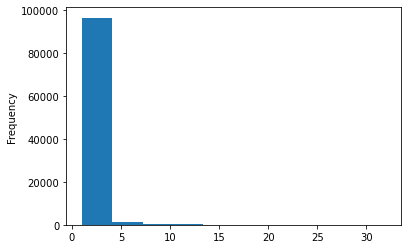

In [485]:
session_details_user['total_sessions'].plot(kind='hist',bins=10)  # Plot the chart
plt.show() 

Based on the above analysis of session details for users , we see that most users have only 1 session per day..
Only 5% users have more than 2 sessions per day..

In [486]:
#calculating total sessions for all users
global_session_length=session_details.sort_values(by='global_session_id')
global_session_length=session_details.groupby(['event_date','global_session_id']).agg({'event_datetime':[max,min]}).reset_index()
global_session_length.head()

event_date global_session_id          event_datetime                        
                                                   max                     min
0 2022-03-03               412 2022-03-03 22:21:08.511 2022-03-03 22:20:56.595
1 2022-03-03               808 2022-03-03 22:30:57.451 2022-03-03 22:30:57.451
2 2022-03-03               856 2022-03-03 21:06:43.780 2022-03-03 21:06:43.780
3 2022-03-03               857 2022-03-03 21:43:44.767 2022-03-03 21:43:44.767
4 2022-03-03               858 2022-03-03 23:19:00.479 2022-03-03 23:19:00.479

In [487]:
global_session_length=global_session_length.droplevel(0,axis=1)

In [488]:
global_session_length.columns=['event_date','global_session_id','max','min']

In [489]:
global_session_length['session_length']= (global_session_length['max'] - global_session_length['min'] )/ np.timedelta64(1, 'us') 

In [490]:
global_session_length.head()

,event_date,global_session_id,max,min,session_length
0,2022-03-03,412,2022-03-03 22:21:08.511,2022-03-03 22:20:56.595,11916000.0
1,2022-03-03,808,2022-03-03 22:30:57.451,2022-03-03 22:30:57.451,0.0
2,2022-03-03,856,2022-03-03 21:06:43.780,2022-03-03 21:06:43.780,0.0
3,2022-03-03,857,2022-03-03 21:43:44.767,2022-03-03 21:43:44.767,0.0
4,2022-03-03,858,2022-03-03 23:19:00.479,2022-03-03 23:19:00.479,0.0


In [491]:
#session_length converted to minutes..only session_length greater than 10 seconds taken for analysis
global_session_length['session_length']=global_session_length['session_length']/(60 * 1000 * 1000) 
global_session_length=global_session_length[global_session_length['session_length']>(10/60)]

In [492]:
global_session_length=global_session_length.sort_values(by='session_length')
global_session_length.head()


,event_date,global_session_id,max,min,session_length
102304,2022-03-27,131481,2022-03-27 11:04:25.470004,2022-03-27 11:04:15.470,0.166667
50973,2022-03-15,103093,2022-03-15 14:30:47.040003,2022-03-15 14:30:37.039,0.166683
73155,2022-03-21,24145,2022-03-21 09:55:47.498002,2022-03-21 09:55:37.496,0.166700
75858,2022-03-21,114077,2022-03-21 13:43:00.708003,2022-03-21 13:42:50.705,0.166717
131876,2022-04-03,112534,2022-04-03 08:49:33.538001,2022-04-03 08:49:23.534,0.166733


In [493]:
global_session_length_group=global_session_length.groupby('event_date').agg({'global_session_id':'nunique','session_length':'sum'}).reset_index()
global_session_length_group=global_session_length_group.rename(columns={'global_session_id':'total_number_of_sessions','session_length':'total_session_length'})
global_session_length_group['total_session_length']=global_session_length_group['total_session_length'].astype('int')
global_session_length_group.head()

,event_date,total_number_of_sessions,total_session_length
0,2022-03-03,322,2582
1,2022-03-04,2279,15439
2,2022-03-05,2201,14403
3,2022-03-06,2193,15499
4,2022-03-07,2119,15033


In [494]:
user_session_length=session_details.groupby(['user_id','event_date','user_session_id']).agg({'event_datetime':[max,min]})
user_session_length=user_session_length.droplevel(0,axis=1)
user_session_length=user_session_length.reset_index()
user_session_length.head()

,user_id,event_date,user_session_id,max,min
0,0001a17e6742a9eac821179de1fa3a7f,2022-04-01,1,2022-04-01 16:11:25.044010,2022-04-01 15:28:11.528
1,0001e48c9217f5614db12a3b3cb30b35,2022-03-08,1,2022-03-08 06:54:51.195000,2022-03-08 06:54:51.195
2,000405116e43117325473d9bfebac364,2022-03-19,1,2022-03-19 12:32:13.772003,2022-03-19 12:31:47.278
3,000405116e43117325473d9bfebac364,2022-03-24,2,2022-03-24 05:29:38.669004,2022-03-24 05:29:19.390
4,0006f53fa1d9d3b91ce8e60eeb574067,2022-03-29,1,2022-03-29 21:38:12.750001,2022-03-29 21:38:08.346


In [495]:
user_session_length['event_week']  = user_session_length['event_date'].dt.week
user_session_length['event_year']  = user_session_length['event_date'].dt.year
user_session_length['event_month']  = user_session_length['event_date'].dt.month
user_session_length['session_length']= (user_session_length['max'] - user_session_length['min'] )/ np.timedelta64(1, 'us') 
user_session_length.head()

,user_id,event_date,user_session_id,max,min,event_week,event_year,event_month,session_length
0,0001a17e6742a9eac821179de1fa3a7f,2022-04-01,1,2022-04-01 16:11:25.044010,2022-04-01 15:28:11.528,13,2022,4,2.593516e+09
1,0001e48c9217f5614db12a3b3cb30b35,2022-03-08,1,2022-03-08 06:54:51.195000,2022-03-08 06:54:51.195,10,2022,3,0.000000e+00
2,000405116e43117325473d9bfebac364,2022-03-19,1,2022-03-19 12:32:13.772003,2022-03-19 12:31:47.278,11,2022,3,2.649400e+07
3,000405116e43117325473d9bfebac364,2022-03-24,2,2022-03-24 05:29:38.669004,2022-03-24 05:29:19.390,12,2022,3,1.927900e+07
4,0006f53fa1d9d3b91ce8e60eeb574067,2022-03-29,1,2022-03-29 21:38:12.750001,2022-03-29 21:38:08.346,13,2022,3,4.404001e+06


In [496]:
user_session_length['session_length']=user_session_length['session_length']/(60 * 1000 * 1000) 
user_session_length.head(5)

,user_id,event_date,user_session_id,max,min,event_week,event_year,event_month,session_length
0,0001a17e6742a9eac821179de1fa3a7f,2022-04-01,1,2022-04-01 16:11:25.044010,2022-04-01 15:28:11.528,13,2022,4,43.225267
1,0001e48c9217f5614db12a3b3cb30b35,2022-03-08,1,2022-03-08 06:54:51.195000,2022-03-08 06:54:51.195,10,2022,3,0.000000
2,000405116e43117325473d9bfebac364,2022-03-19,1,2022-03-19 12:32:13.772003,2022-03-19 12:31:47.278,11,2022,3,0.441567
3,000405116e43117325473d9bfebac364,2022-03-24,2,2022-03-24 05:29:38.669004,2022-03-24 05:29:19.390,12,2022,3,0.321317
4,0006f53fa1d9d3b91ce8e60eeb574067,2022-03-29,1,2022-03-29 21:38:12.750001,2022-03-29 21:38:08.346,13,2022,3,0.073400


In [497]:
user_session_length=user_session_length[user_session_length['session_length']>(10/60)]
user_session_length=user_session_length.sort_values(by='session_length',ascending=False)
user_session_length.head()

,user_id,event_date,user_session_id,max,min,event_week,event_year,event_month,session_length
122060,e1f9e0c45812c0e2721a20e86f4a0851,2022-03-29,50,2022-03-29 21:13:56.496002,2022-03-29 13:08:15.436,13,2022,3,485.684333
122044,e1f9e0c45812c0e2721a20e86f4a0851,2022-03-25,34,2022-03-25 17:08:27.194011,2022-03-25 11:26:07.600,12,2022,3,342.326567
122041,e1f9e0c45812c0e2721a20e86f4a0851,2022-03-24,31,2022-03-24 15:45:17.215010,2022-03-24 10:11:22.815,12,2022,3,333.906667
122059,e1f9e0c45812c0e2721a20e86f4a0851,2022-03-28,49,2022-03-28 23:20:25.308010,2022-03-28 19:29:55.144,13,2022,3,230.502734
122028,e1f9e0c45812c0e2721a20e86f4a0851,2022-03-22,18,2022-03-22 16:54:47.946000,2022-03-22 13:21:57.185,12,2022,3,212.846017


In [498]:
user_session_length.duplicated().sum()

0

In [499]:
user_with_more_sessions=user_session_length.groupby(['user_id','event_date']).agg({'user_session_id':'nunique','session_length':'sum'}).reset_index()
user_with_more_sessions=user_with_more_sessions.rename(columns={'user_session_id':'number_of_sessions'})
user_with_more_sessions['average_length_per_session']=user_with_more_sessions['session_length']/user_with_more_sessions['number_of_sessions']
user_with_more_sessions=user_with_more_sessions.sort_values(by='average_length_per_session',ascending=False)
user_with_more_sessions.head()

,user_id,event_date,number_of_sessions,session_length,average_length_per_session
51398,e1f9e0c45812c0e2721a20e86f4a0851,2022-03-29,2,577.773484,288.886742
50291,dcbf86ed8677926f34f8da0c91fa3e87,2022-03-24,1,194.710234,194.710234
50295,dcbf86ed8677926f34f8da0c91fa3e87,2022-03-28,1,184.028935,184.028935
45910,c54aadef6cf80db7b18ebd609e15d9f5,2022-03-06,1,177.743934,177.743934
51394,e1f9e0c45812c0e2721a20e86f4a0851,2022-03-25,3,477.128167,159.042722


In [500]:
user_with_more_sessions['number_of_sessions'].describe()

count    57168.000000
mean         1.206374
std          0.575644
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         11.000000
Name: number_of_sessions, dtype: float64

Around 75% of users have only 1 session per day..

<a id='dau'> 

### DAU

DAU is calculated based on users with session more than 10secs using user_session_length dataset..

In [501]:
#dau is calculated based on users with session > 10 secs using user_session_length dataset..
dau_total = user_session_length.groupby('event_date').agg({'user_id': 'nunique'}).reset_index()

In [502]:
dau_total=dau_total.rename(columns={'user_id':'daily_active_users'})
dau_total.head()

,event_date,daily_active_users
0,2022-03-03,319
1,2022-03-04,1905
2,2022-03-05,1877
3,2022-03-06,1833
4,2022-03-07,1774


In [503]:
#dau and session details per day
session_dau_details = global_session_length_group.merge(dau_total ,on='event_date')
session_dau_details['average_session_length']=(session_dau_details['total_session_length']/session_dau_details['total_number_of_sessions']).round().astype('int')
session_dau_details.head()

,event_date,total_number_of_sessions,total_session_length,daily_active_users,average_session_length
0,2022-03-03,322,2582,319,8
1,2022-03-04,2279,15439,1905,7
2,2022-03-05,2201,14403,1877,7
3,2022-03-06,2193,15499,1833,7
4,2022-03-07,2119,15033,1774,7


In [504]:
#plot dau and session details
session_dau_details_melt = session_dau_details.melt(id_vars='event_date', value_vars=['daily_active_users','total_number_of_sessions','average_session_length'])
px.line(session_dau_details_melt, x='event_date' , y='value' , color='variable')

The average session length is around 7-8minutes consistently for almost all the sessions..
Daily Active User and total number of sessions shows similar pattern of spike and dips..  
Most of the user have 1 session per day with average session duration of 7-8 minutes..

<a id='end'> 

### Final Conclusion.  


1.Based on our analysis , we see that 'app.norbu.premium' is the product bought by more users though it is pricier.(20-30)  
We also see that user getting it on sale(15-20$).  

2. we can offer more 'app.norbu.premium' features in the range (15-20$) especially for ANDROID users.  
3.'norbu_month' is on the lower range of price , for which we can try increasing the features available.  
More features with less price might be a better combination to try with..  
4.norbu_annual_ios is the product tried on free_trial .. Also more than 84% of users opted free trial within a day  
of first touch . But hardly 1% of users became paid users..   
Many users didn't continue more than 2 days in free_trial period..  
So we can add more interesting features in free_trial period of IOS version..  
5.Though the users gained through google-play are more ,direct users contribute more to the values.   
6.In terms of geogarphy , Europe contributes more to the total value with Russion ,Belgium and France  
ranking the top 3.    
7.Android users show better retention than IOS users.  
8.When considering sessions , 75% of users have around 1 session / day with average session length around 7-8minutes..  

From all the above points we see that we need to get some changes with IOS as IOS retention is lesser compared  
to Android and also conversion rate from free to paid user is way less..Users are not in free trial for longer time..  
So we need to either change the plan for free trial or add some interesting features to attract user to stay longer and  
proceed with paid subscription..'app.norbu.premium' can be given with some extra features in the range (15-20$)for Android  
users as more users prefer this price range...These changes will improve the retention rate and conversion rate ..
